Link to github repo with the code: https://github.com/ismael-Clark5/DLH.git

Link to video presentation (in UIUC's Google Drive): https://drive.google.com/file/d/1H7WuDOc-vXl2gJ6cuWeHUXcDm5djPl9r/view?usp=sharing

# Introduction

The subsequent paper endeavors to replicate and validate the groundbreaking findings presented by Jae Yong Ryu, Hyun Uk Kim, and Sang Yup Lee in their seminal work titled "Deep learning improves prediction of drug–drug and drug–food interactions" (1).

In their comprehensive study, the authors tackle the intricate challenge of multilabel classification in Drug-Drug Interaction (DDI) and Drug-Food Interaction (DFI) prediction, employing a sophisticated deep learning framework named DeepDDI and leveraging the DDI gold standard dataset. This research holds paramount significance within the healthcare landscape, as DDIs are implicated in nearly 30% of all Adverse Drug Effects (2), a concern exacerbated by the fact that a staggering 67% of elderly Americans are reportedly managing five or more medications, spanning prescriptions, over-the-counter drugs, and dietary supplements (3).

Historically, addressing the complexities of DDIs and DFIs has been hindered by two primary obstacles. Prior models, predating DeepDDI, often focused solely on predicting the likelihood of interaction between drugs, failing to delve into the nuanced pharmacological implications of these interactions. Moreover, many of these methodologies relied heavily on detailed drug information such as targets, interacting drugs, and side effects, data that is frequently inaccessible, thereby impeding prediction accuracy (4-10). Notably, previous methodologies largely overlooked the analysis of DFIs, further underscoring the novelty and necessity of the DeepDDI framework.

The original study juxtaposed DeepDDI against Random Forest Classifiers and K-Nearest Neighbors, showcasing its superior performance (1). DeepDDI, characterized as a Deep Neural Network multi-label classifier, demonstrates an impressive 92.4% mean accuracy (1), representing a substantial leap forward in comparison to conventional machine learning approaches.

DeepDDI introduces a paradigm shift in DDI and DFI prediction by effectively utilizing the diverse spectrum of compound types, including natural products found in food, to predict interactions. Notably, it requires only the names of the two drugs under scrutiny and their simplified molecular-input line-entry system (SMILES) representations as input pairs, streamlining the prediction process.

These groundbreaking results hold promise for revolutionizing healthcare services and streamlining drug development processes, potentially leading to significant cost savings, by accurately predicting the effects of drug interactions with food and other medications.




# Scope of Reproducibility:

## Hypothesis
Hypothesis 1: Setting a threshold of 0.47, DeepDDI demonstrates a mean accuracy of 92.4%.

Hypothesis 2: Employing a configuration of 9 hidden layers each comprising 2048 nodes, DeepDDI attains its peak accuracy of 92.4%.

Hypothesis 3: Through 100 epochs of training iterations, DeepDDI optimally achieves the aforementioned accuracy results

## Experiements to run:

  We will try to run the DeepDDI models with different values for number of epochs, number of hidden layers and nodes and different threshold values and we will compare our results with those of the paper. Currently, we are only trying to verify the results, given the length of time needed for training.

# Methodology

In [1]:
!pip install --upgrade pip --quiet

ERROR: To modify pip, please run the following command:
C:\Users\mugui\anaconda3\envs\adel-ismael-project\python.exe -m pip install --upgrade pip --quiet


In [2]:
!pip -q install torch
!pip -q install matplotlib
!pip -q install pandas
!pip -q install torch torchvision

In [3]:
!pip -q install scikit-learn
!pip -q install scipy

In [4]:
import torch

In [5]:
!pip -q --disable-pip-version-check install wheel setuptools --upgrade 

In [6]:
!pip -q install cmake

In [7]:
!pip -q --disable-pip-version-check uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip -q --disable-pip-version-check install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip -q --disable-pip-version-check install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip -q --disable-pip-version-check install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip -q --disable-pip-version-check install git+https://github.com/pyg-team/pytorch_geometric.git

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdrug 0.2.1 requires torch-cluster>=1.5.9, which is not installed.


In [8]:
%pip -q install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.10.0+cpu.html
%pip -q install torchdrug
%pip -q install -e git+https://github.com/lucag2/chemicalx.git#egg=chemicalx

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Note: you may need to restart the kernel to use updated packages.


In [10]:
# import  packages you need
import torch
import numpy as np
import chemicalx
# from google.colab import drive
from sklearn.metrics import *
from chemicalx.data import DrugbankDDI, BatchGenerator
from torch import nn
from chemicalx.data import DrugPairBatch
from chemicalx.models import Model
import pandas as pd
from matplotlib import pyplot as plt
import copy

c:\Users\mugui\anaconda3\envs\adel-ismael-project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##  Data

To replicate the findings outlined in the paper, we opted to utilize the drugbankDDI dataset available within the ChemicalX library. This library offers various data loaders tailored to load diverse pre-processed datasets. The preprocessing script utilized within the ChemicalX library to generate the drugbankDDI dataset, facilitating the replication of the paper's results, is provided below.

The dataset consists of pairs of drugs, with each pair accompanied by a label indicating the interaction between them, thereby discerning whether the interaction leads to any adverse effects.

Please note: The subsequent script is utilized within the ChemicalX library to clean and retrieve the drugbankDDI dataset. Additionally, the model defined below it is sourced from the ChemicalX library.

In [11]:
# """Download and pre-process the DrugBank drug-drug interaction dataset."""

# import math
# from random import Random

# import click
# import pandas as pd
# from utils import get_index, get_samples, get_tdc, write_artifacts


# @click.command()
# @click.option("--seed", type=int, default=42, show_default=True, help="Random seed")
# @click.option("--ratio", type=float, default=1.0, show_default=True, help="Negative sampling ratio")
# def main(seed: int, ratio: float):
#     """Download and pre-process the DrugBank DDI dataset."""
#     rng = Random(seed)
#     input_directory, output_directory = get_tdc("drugbank", "drugbankddi")

#     positive_samples = pd.read_csv(
#         input_directory.joinpath("drugbank.tab"),
#         sep="\t",
#         usecols=[0, 1, 2, 4, 5],
#         header=0,
#         names=["drug_1", "drug_2", "context", "drug_1_smiles", "drug_2_smiles"],
#     )
#     positive_samples["context"] = positive_samples["context"].map(lambda x: f"context_{x:02}")
#     print("Number of positive samples:", positive_samples.shape[0])
#     print("Columns:", positive_samples.columns)

#     contexts = list(sorted(set(positive_samples["context"].values.tolist())))
#     print("Number of contexts:", len(contexts))

#     # Index drugs' SMILES and drug-drug-context triples
#     drugs_raw, big_map = get_index(positive_samples)
#     drugs_raw.update(
#         {
#             "DB09323": "O.O.O.O.C(CNCC1=CC=CC=C1)NCC1=CC=CC=C1.[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)CC1=CC=CC=C1)C(O)=O.[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)CC1=CC=CC=C1)C(O)=O",  # noqa:E501
#             "DB13450": "[O-]S(=O)(=O)C1=CC=CC=C1.[O-]S(=O)(=O)C1=CC=CC=C1.COC1=CC2=C(C=C1OC)[C@@H](CC1=CC(OC)=C(OC)C=C1)[N@@+](C)(CCC(=O)OCCCCCOC(=O)CC[N@@+]1(C)CCC3=C(C=C(OC)C(OC)=C3)[C@H]1CC1=CC(OC)=C(OC)C=C1)CC2",  # noqa:E501
#             "DB09396": "O.OS(=O)(=O)C1=CC2=CC=CC=C2C=C1.CCC(=O)O[C@@](CC1=CC=CC=C1)([C@H](C)CN(C)C)C1=CC=CC=C1",
#             "DB09162": "[Fe+3].OC(CC([O-])=O)(CC([O-])=O)C([O-])=O",
#             "DB11106": "CC(C)(N)CO.CN1C2=C(NC(Br)=N2)C(=O)N(C)C1=O",
#             "DB11630": "C1CC2=NC1=C(C3=CC=C(N3)C(=C4C=CC(=N4)C(=C5C=CC(=C2C6=CC(=CC=C6)O)N5)C7=CC(=CC=C7)O)C8=CC(=CC=C8)O)C9=CC(=CC=C9)O",  # noqa:E501
#             "DB00958": "C1CC(C1)(C(=O)O)C(=O)O.[NH2-].[NH2-].[Pt+2]",
#             "DB00526": "C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2]",
#             "DB13145": "C(C(=O)O)O.[NH2-].[NH2-].[Pt+2]",
#             "DB00515": "N.N.Cl[Pt]Cl",
#         }
#     )

#     drugs = list(drugs_raw)
#     print("Number of drugs:", len(drugs))

#     # Generate negative samples
#     negative_samples = get_samples(
#         rng=rng, n=int(math.ceil(ratio * positive_samples.shape[0])), drugs=drugs, contexts=contexts, big_map=big_map
#     )

#     labeled_triples = positive_samples[["drug_1", "drug_2", "context"]]
#     labeled_triples["label"] = 1.0
#     labeled_triples = pd.concat([labeled_triples, negative_samples])
#     print("Number of total triples:", labeled_triples.shape)
#     labeled_triples.to_csv(output_directory.joinpath("labeled_triples.csv"), index=False)

#     write_artifacts(output_directory=output_directory, drugs_raw=drugs_raw, contexts=contexts)


# if __name__ == "__main__":
#     main()

In [12]:
loader = DrugbankDDI()

context_set = loader.get_context_features()
drug_set = loader.get_drug_features()
triples = loader.get_labeled_triples()
cross_validation_split = 0.5
train, test = triples.train_test_split(train_size=cross_validation_split)

generator = BatchGenerator(batch_size=1024,
                           context_features=True,
                           drug_features=True,
                           drug_molecules=False,
                           context_feature_set=context_set,
                           drug_feature_set=drug_set,
                           labeled_triples=train)

# calculate statistics
def calculate_stats(train, test):
  # implement this function to calculate the statistics
  # it is encouraged to print out the results
  print(f"Cross Validation Split: {cross_validation_split}")
  print(f"Train Dataset Size: {len(train)}")
  print(f"Total number of drugs in Train: {train.get_drug_count()}")
  print(f'Total number of unique drug pairs in Train: {train.get_combination_count()}')
  print(f"Label split in Train (Positive, Negative): ({train.get_positive_count()}, {train.get_negative_count()})")
  print(f"Ratio of label split in Train (Positive, Negative): ({train.get_positive_rate()}, {train.get_negative_rate()})")
  print(f"Test Dataset Size: {len(test)}")
  print(f"Total number of drugs in Test: {test.get_drug_count()}")
  print(f'Total number of unique drug pairs in Test: {test.get_combination_count()}')
  print(f"Label split in Test (Positive, Negative): ({test.get_positive_count()}, {test.get_negative_count()})")
  print(f"Ratio of label split in Test (Positive, Negative): ({test.get_positive_rate()}, {test.get_negative_rate()})")
  return None

calculate_stats(train, test)

Cross Validation Split: 0.5
Train Dataset Size: 191808
Total number of drugs in Train: 1706
Total number of unique drug pairs in Train: 187091
Label split in Train (Positive, Negative): (96011, 95797)
Ratio of label split in Train (Positive, Negative): (0.5005578495161829, 0.4994421504838171)
Test Dataset Size: 191808
Total number of drugs in Test: 1706
Total number of unique drug pairs in Test: 187068
Label split in Test (Positive, Negative): (95797, 96011)
Ratio of label split in Test (Positive, Negative): (0.4994421504838171, 0.5005578495161829)


##   Model

Original Paper: Ryu, J. Y., Kim, H. U., & Lee, S. Y. (2018). Deep learning improves prediction of drug–drug and drug–food interactions. Proceedings of the National Academy of Sciences of the United States of America, 115(18). https://doi.org/10.1073/pnas.1803294115

Chemical X Library Paper : Benedek Rozemberczki, Charles Tapley Hoyt, Anna Gogleva, Piotr Grabowski, Klas Karis, Andrej Lamov, Andriy Nikolov, Sebastian Nilsson, Michael Ughetto, Yu Wang, Tyler Derr, and Benjamin M. Gyori. 2022. ChemicalX: A Deep Learning Library for Drug Pair Scoring. In Proceedings of the 28th ACM SIGKDD Conference on Knowledge Discovery and Data Mining (KDD '22). Association for Computing Machinery, New York, NY, USA, 3819–3828. https://doi.org/10.1145/3534678.3539023

There is no repo associated with the paper.

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
__all__ = [
    "DeepDDI",
]


class DeepDDI(Model):
    """An implementation of the DeepDDI model from [ryu2018]_.

    .. seealso:: This model was suggested in https://github.com/AstraZeneca/chemicalx/issues/2

    .. [ryu2018] Ryu, J. Y., *et al.* (2018). `Deep learning improves prediction
       of drug–drug and drug–food interactions <https://doi.org/10.1073/pnas.1803294115>`_.
       *Proceedings of the National Academy of Sciences*, 115(18), E4304–E4311.
    """

    def __init__(
        self,
        *,
        drug_channels: int,
        hidden_channels: int = 2048,
        hidden_layers_num: int = 9,
        out_channels: int = 1,
    ):
        """Instantiate the DeepDDI model.

        :param drug_channels: The number of drug features.
        :param hidden_channels: The number of hidden layer neurons.
        :param hidden_layers_num: The number of hidden layers.
        :param out_channels: The number of output channels.
        """
        super().__init__()
        assert hidden_layers_num > 1
        layers = [
            nn.Linear(drug_channels * 2, hidden_channels),
            nn.ReLU(),
            nn.BatchNorm1d(num_features=hidden_channels, affine=True, momentum=None),
            nn.ReLU(),
        ]
        for _ in range(hidden_layers_num - 1):
            layers.extend(
                [
                    nn.Linear(hidden_channels, hidden_channels),
                    nn.ReLU(),
                    nn.BatchNorm1d(num_features=hidden_channels, affine=True, momentum=None),
                    nn.ReLU(),
                ]
            )
        layers.extend([nn.Linear(hidden_channels, out_channels), nn.Sigmoid()])
        self.final = nn.Sequential(*layers)

    def unpack(self, batch: DrugPairBatch):
        """Return the context features, left drug features and right drug features."""
        return (
            batch.drug_features_left,
            batch.drug_features_right,
        )

    def _combine_sides(self, left: torch.FloatTensor, right: torch.FloatTensor) -> torch.FloatTensor:
        return torch.cat([left, right], dim=1)

    def forward(
        self,
        drug_features_left: torch.FloatTensor,
        drug_features_right: torch.FloatTensor,
    ) -> torch.FloatTensor:
        """Run a forward pass of the DeepDDI model.

        :param drug_features_left: A matrix of head drug features.
        :param drug_features_right: A matrix of tail drug features.
        :returns: A column vector of predicted interaction scores.
        """
        hidden = self._combine_sides(drug_features_left, drug_features_right)
        return self.final(hidden)
# Hyperparameter 1: Hidden_Channels. Values = [128, 256, 1024, 2048 (used by DeepDDI by default)]
model_2048 = DeepDDI(drug_channels=256).to(device)
model_1024 = DeepDDI(drug_channels=256, hidden_channels=1024).to(device)
model_128 = DeepDDI(drug_channels=256, hidden_channels=128).to(device)
model_256 = DeepDDI(drug_channels=256, hidden_channels=256).to(device)


##   Evaluation Implementation
- Definition and implementation of evaluation methods

- Metrics descriptions:

    - `Accuracy` : This metric gauges the proportion of correctly predicted instances out of the total instances. It is calculated by dividing the number of correct predictions by the total number of predictions.
    - `Precision`: Also referred to as positive predictive value, precision assesses the accuracy of positive predictions. It is computed as the number of true positive predictions divided by the total number of positive predictions (true positives plus false positives).
    - `Recall`:  Commonly known as sensitivity, recall measures the ability of the classifier to identify all positive instances. It is determined by dividing the number of true positive predictions by the total number of actual positive instances (true positives plus false negatives).
    - `F1-Score`: The F1-score serves as the harmonic mean of precision and recall. It offers a unified metric that balances both precision and recall. F1-score reaches its optimal value at 1 (indicating perfect precision and recall) and its lowest at 0.
    - `Root Mean Squared Error`: Widely utilized in evaluating regression models, RMSE quantifies the accuracy of predictions by measuring the average of the squares of the errors. The error is defined as the difference between the predicted value and the actual value. Subsequently, the square root of this average is taken, providing insight into the spread of errors.

In [15]:
def classification_metrics(Y_pred, Y_true):
    acc, precision, recall, f1score, rmse = accuracy_score(Y_true, Y_pred), \
                                          precision_score(Y_true, Y_pred), \
                                          recall_score(Y_true, Y_pred), \
                                          f1_score(Y_true, Y_pred), \
                                          root_mean_squared_error(Y_true, Y_pred)
    return acc,  precision, recall, f1score, rmse



#input: model, threshold
def evaluate(model, threshold = 0.47):
    model.eval()

    generator.labeled_triples = test

    predictions = []
    for batch in generator:
      batch = batch.to(device)
      prediction = model(batch.drug_features_left, batch.drug_features_right)
      prediction = prediction.detach().cpu().numpy()
      identifiers = batch.identifiers
      identifiers["prediction"] = prediction
      predictions.append(identifiers)
      
      
    predictions_df = pd.concat(predictions)
    Y_true = predictions_df["label"]
    Y_pred = (predictions_df["prediction"] > threshold).astype(int)
    acc, precision, recall, f1, rmse = classification_metrics(Y_true, Y_pred)
    return acc, precision, recall, f1, rmse

##   Training

**Computation Requirements**: 
 - Hardware: Nvidia GeForce 4070 Super GPU, Intel i7-13700k, leveraing CUDA for torch. 
 - Total Training time ~4 hours with GPU. Using CPU training took over 20 hours. 
 - We used number of epochs as a hyperparameter so its value changed from iteration to iteration. In total, all four models were trained using each value giving 4 * 275 = 1100 total number of training epochs.


**Hyperparameter**
We decided to select three hyperparameters based on the information provided in the original paper. There, they mention that the evaluation threshold used is 0.47, they trained the models using 100 epochs and the model has 2048 hidden channels. We decided that using these parameters, we could modify the values and evaluate our results.
 - The proposed values are:
   - Threshold = [0.44, 0.47 (for verification), 0.5]
   - Number of Epochs = [50, 100 (for verification), 125]
   - Number of hidden channels = [128,256, 1024, 2048 (for verification)]

In [16]:
def train_model_(num_epochs=100, model=None,optimizer=None,\
                loss = torch.nn.BCELoss()):
  # Hyperparameter 3: Classification threshold. Values = [0.44, 0.47 (default), 0.50].
  threshold_values = [0.44, 0.47, 0.50]
  if optimizer == None:
    optimizer= torch.optim.Adam(model.parameters())
    
  train_loss_arr = []
  metrics_results = {}
  for _ in range(num_epochs):
    model.train()
    train_loss_value = 0
    for batch in generator:
      optimizer.zero_grad()

      # Move data to GPU
      drug_features_left = batch.drug_features_left.to(device)
      drug_features_right = batch.drug_features_right.to(device)
      labels = batch.labels.to(device)
      
      prediction = model(drug_features_left, drug_features_right)

      loss_value = loss(prediction, labels)
      loss_value.backward()

      optimizer.step()
      train_loss_value += loss_value.item()
    train_loss = train_loss_value / len(generator)

    train_loss_arr.append(train_loss)
    for threshold_value in threshold_values:
      if threshold_value not in metrics_results: 
         metrics_results[threshold_value] = []
      metrics_results[threshold_value].append(evaluate(copy.deepcopy(model), threshold_value))

  return train_loss_arr, metrics_results

In [17]:
%matplotlib inline

# Results

In [18]:
def results(trained_model, number_epochs, hidden_channels):
  def plot_metric(ax, metric_list, label, title):
    ax.plot(metric_list, label=label)
    ax.set_xlabel('Epoch')
    ax.set_title(title)
    ax.legend()
  
  metrics_results = trained_model[1]
  train_loss_arr = trained_model[0]
  for metric_result_per_threshold_key in metrics_results.keys():
    metric_result_per_threshold_value = metrics_results[metric_result_per_threshold_key]
    acc_list, precision_list, recall_list, f1_list, rmse_list = zip(*metric_result_per_threshold_value)

    # metrics to evaluate my model
    print(f"Threshold: {metric_result_per_threshold_key} Number of Epochs: {number_epochs} Hidden Channels: {hidden_channels} \n ACC: {np.mean(np.array(list(acc_list))):.3f}, Precision: {np.mean(np.array(list(precision_list))):.3f},Recall: {np.mean(np.array(list(recall_list))):.3f}, F1: {np.mean(np.array(list(f1_list))):.3f}, RMSE: {np.mean(np.array(list(rmse_list))):.3f}")

    # plot figures to better show the results
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    plot_metric(axes[0, 0], train_loss_arr, "Training Loss", "Model Loss During Training")
    plot_metric(axes[0, 1], list(acc_list), "Accuracy", "Model Accuracy During Training")
    plot_metric(axes[0, 2], list(precision_list), "Precision", "Precision During Training")
    plot_metric(axes[1, 0], list(recall_list), "Recall", "Recall Value During Training")
    plot_metric(axes[1, 1], list(f1_list), "F1 Score", "F1 Score During Training")
    plot_metric(axes[1, 2], list(rmse_list), "RMSE Score", "RMSE Value During Training")
    # it is better to save the numbers and figures for your presentation.

    plt.tight_layout()
    plt.show()

In [19]:
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
print(torch.cuda.is_available())

True


Threshold: 0.44 Number of Epochs: 50 Hidden Channels: 128 
 ACC: 0.767, Precision: 0.599,Recall: 0.905, F1: 0.716, RMSE: 0.480


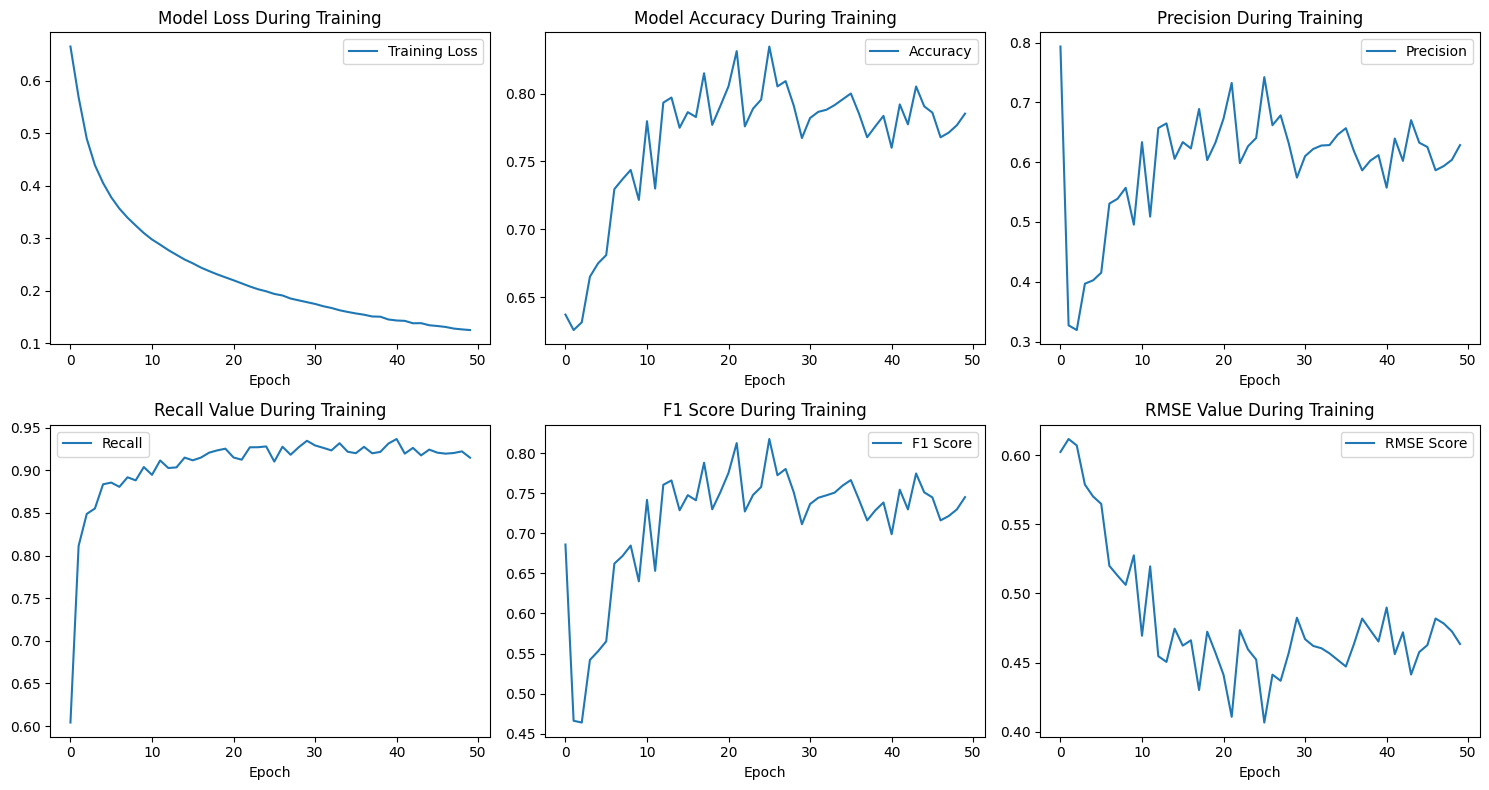

Threshold: 0.47 Number of Epochs: 50 Hidden Channels: 128 
 ACC: 0.765, Precision: 0.593,Recall: 0.907, F1: 0.712, RMSE: 0.482


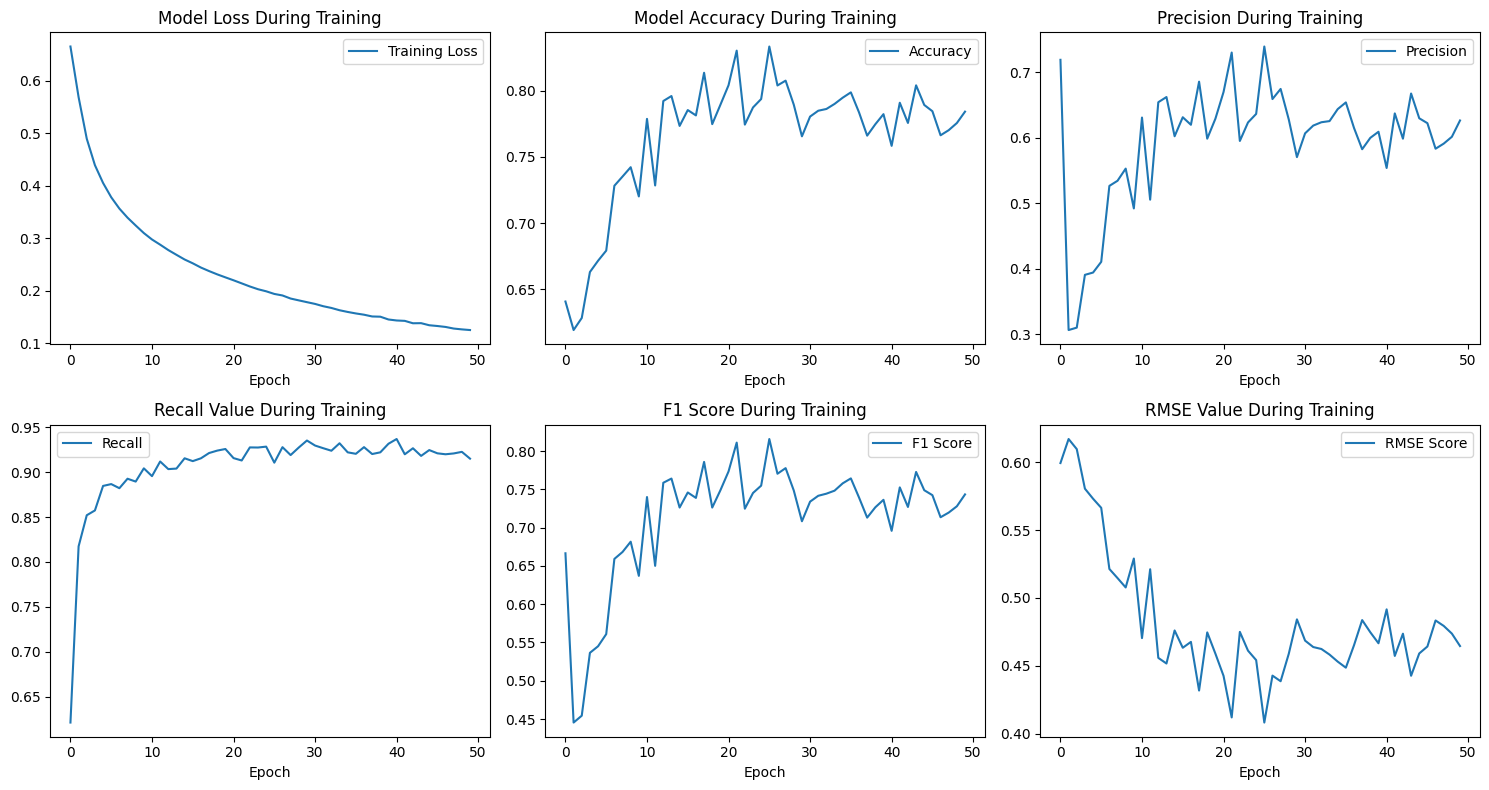

Threshold: 0.5 Number of Epochs: 50 Hidden Channels: 128 
 ACC: 0.764, Precision: 0.587,Recall: 0.908, F1: 0.709, RMSE: 0.484


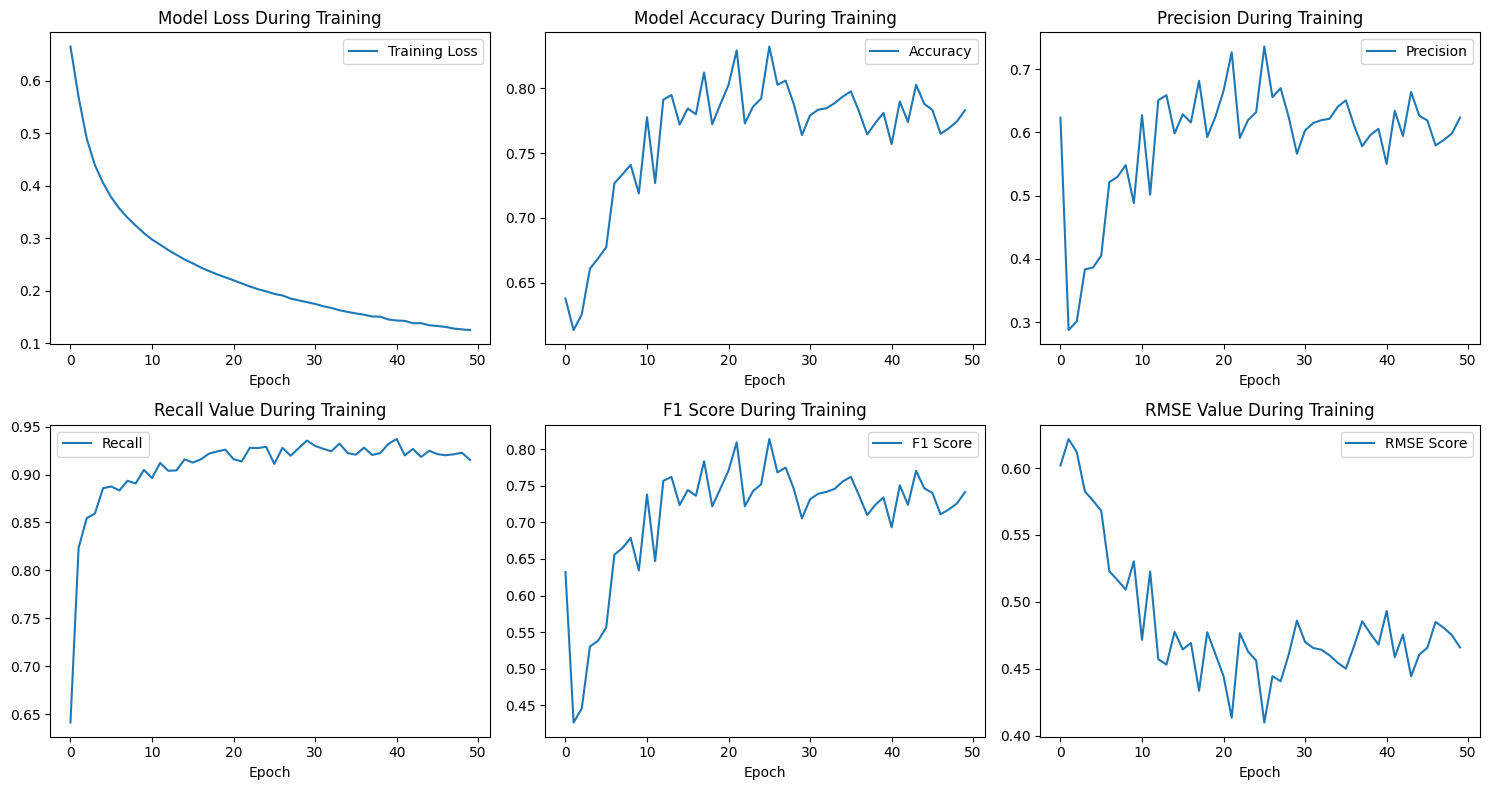

Threshold: 0.44 Number of Epochs: 50 Hidden Channels: 256 
 ACC: 0.868, Precision: 0.849,Recall: 0.885, F1: 0.865, RMSE: 0.360


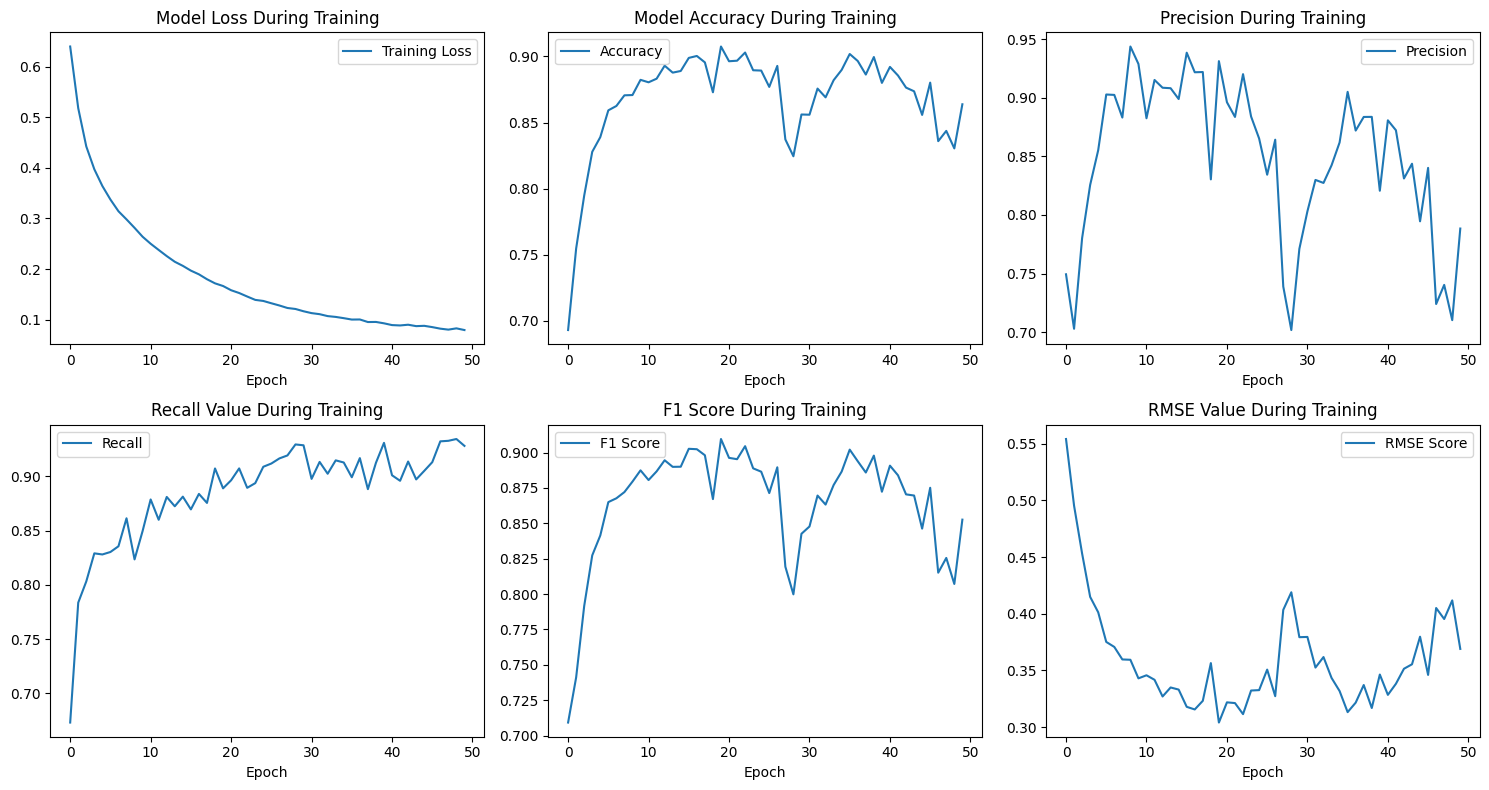

Threshold: 0.47 Number of Epochs: 50 Hidden Channels: 256 
 ACC: 0.868, Precision: 0.846,Recall: 0.886, F1: 0.864, RMSE: 0.361


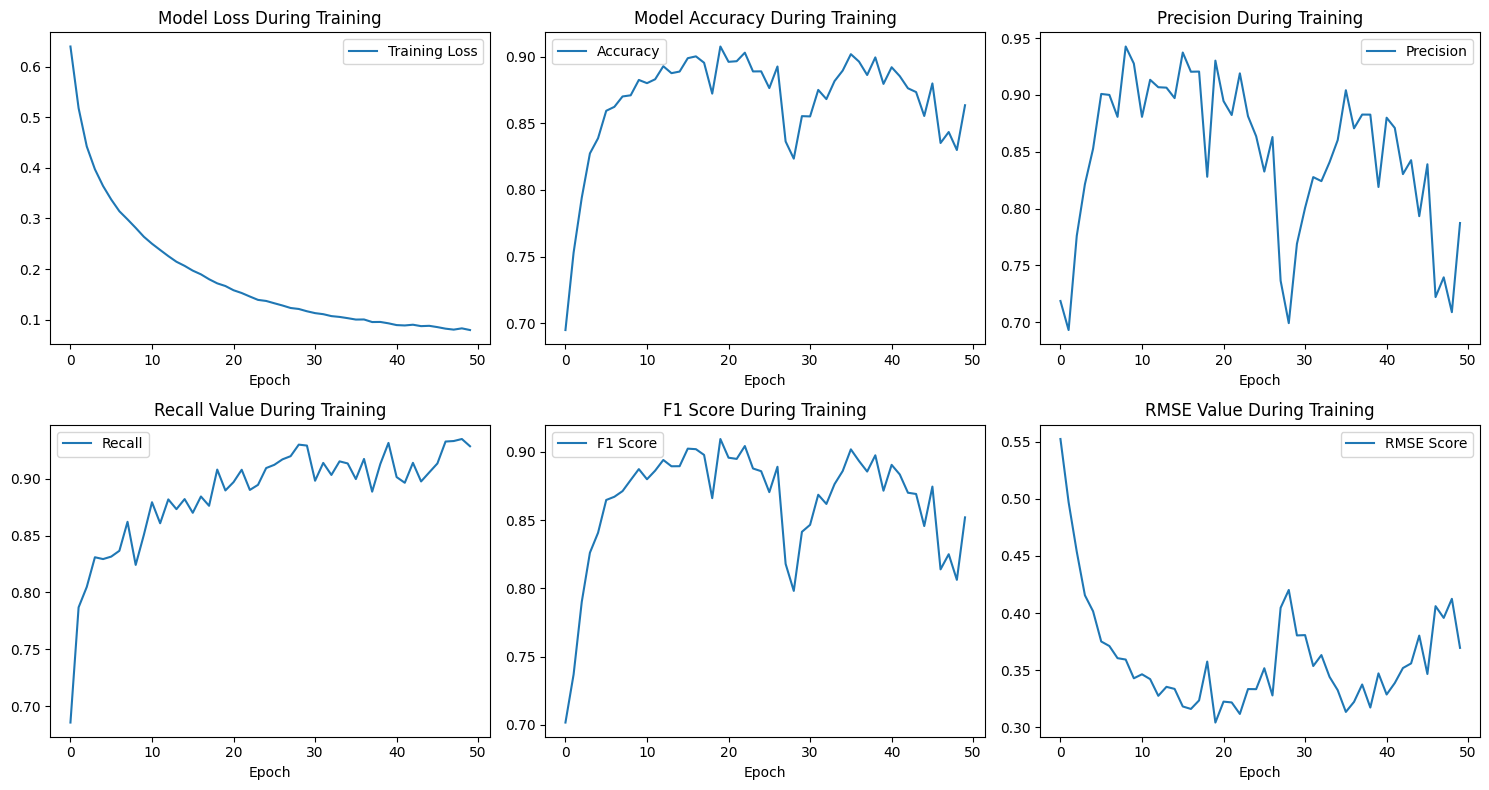

Threshold: 0.5 Number of Epochs: 50 Hidden Channels: 256 
 ACC: 0.867, Precision: 0.844,Recall: 0.887, F1: 0.863, RMSE: 0.361


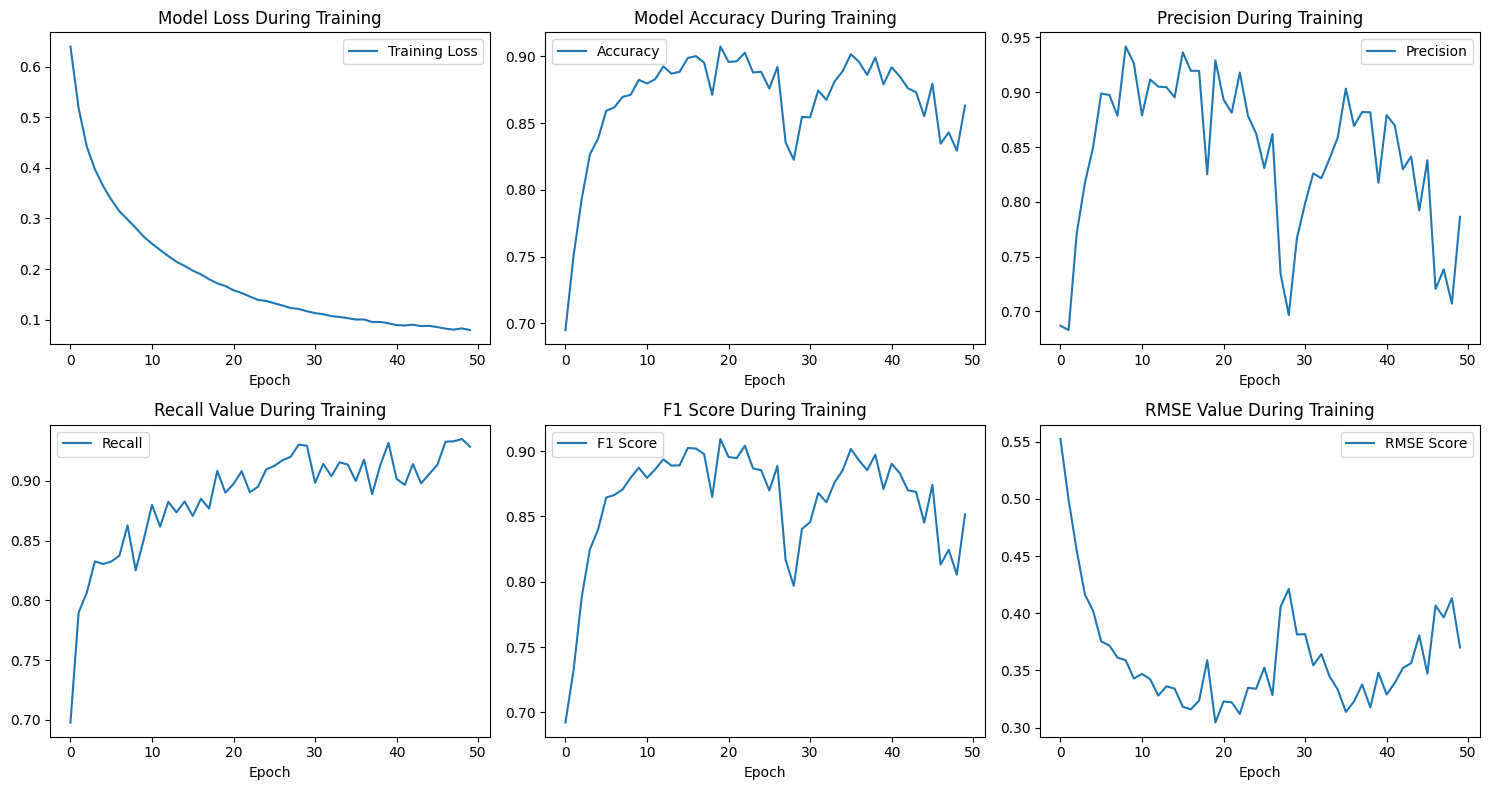

Threshold: 0.44 Number of Epochs: 50 Hidden Channels: 1024 
 ACC: 0.864, Precision: 0.866,Recall: 0.869, F1: 0.862, RMSE: 0.365


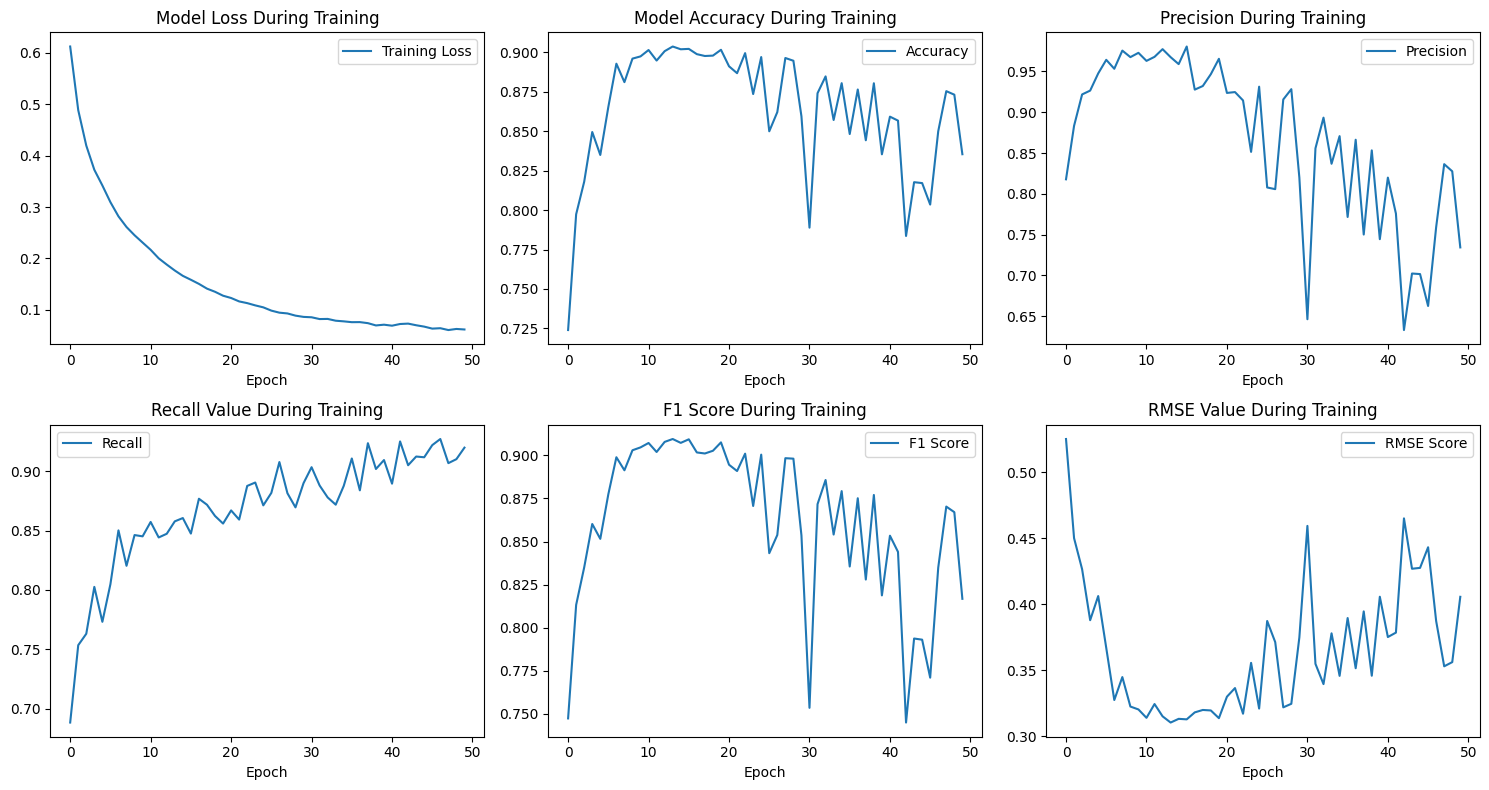

Threshold: 0.47 Number of Epochs: 50 Hidden Channels: 1024 
 ACC: 0.864, Precision: 0.863,Recall: 0.870, F1: 0.862, RMSE: 0.366


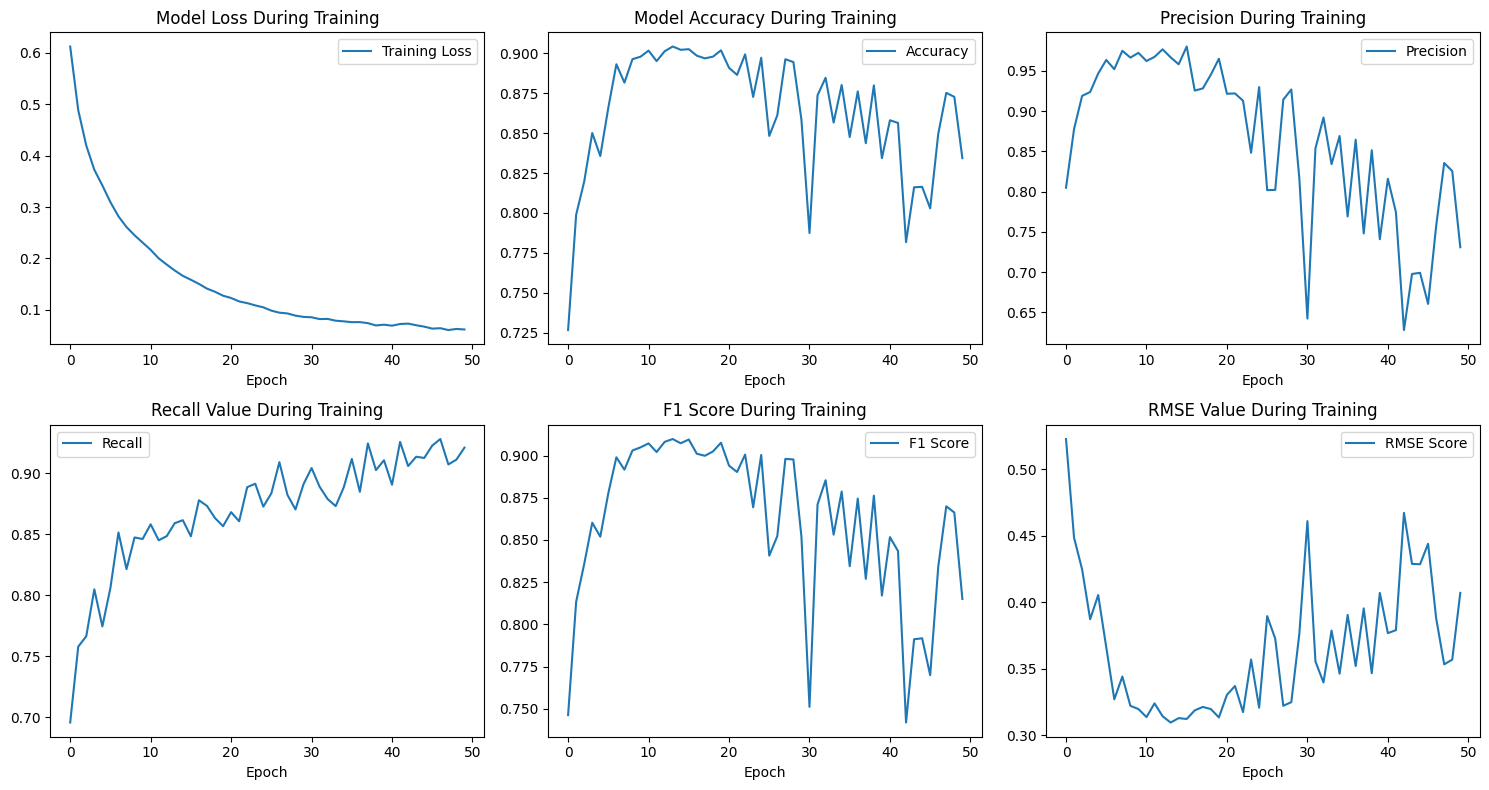

Threshold: 0.5 Number of Epochs: 50 Hidden Channels: 1024 
 ACC: 0.864, Precision: 0.861,Recall: 0.871, F1: 0.861, RMSE: 0.366


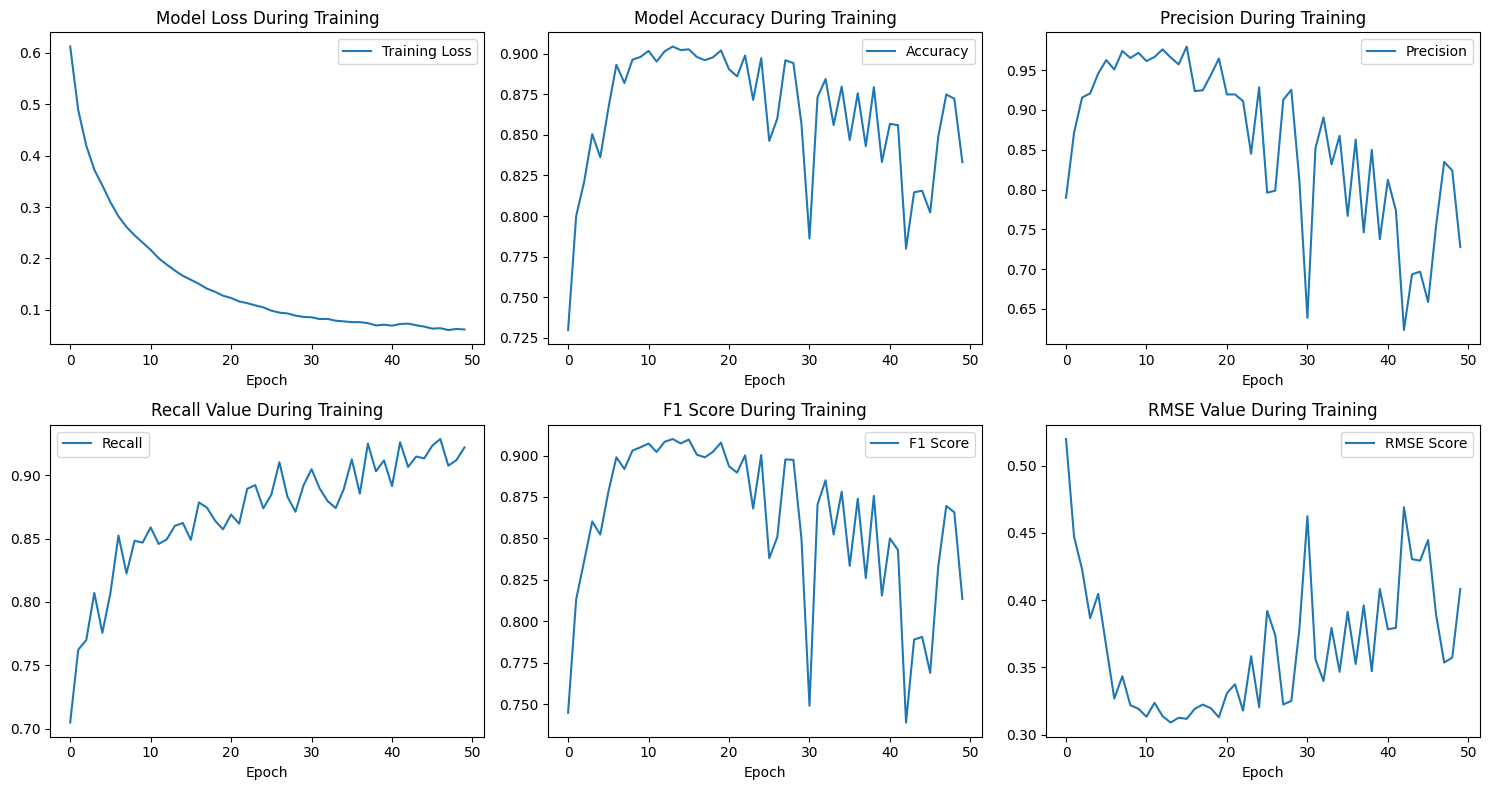

Threshold: 0.44 Number of Epochs: 50 Hidden Channels: 2048 
 ACC: 0.844, Precision: 0.853,Recall: 0.834, F1: 0.811, RMSE: 0.376


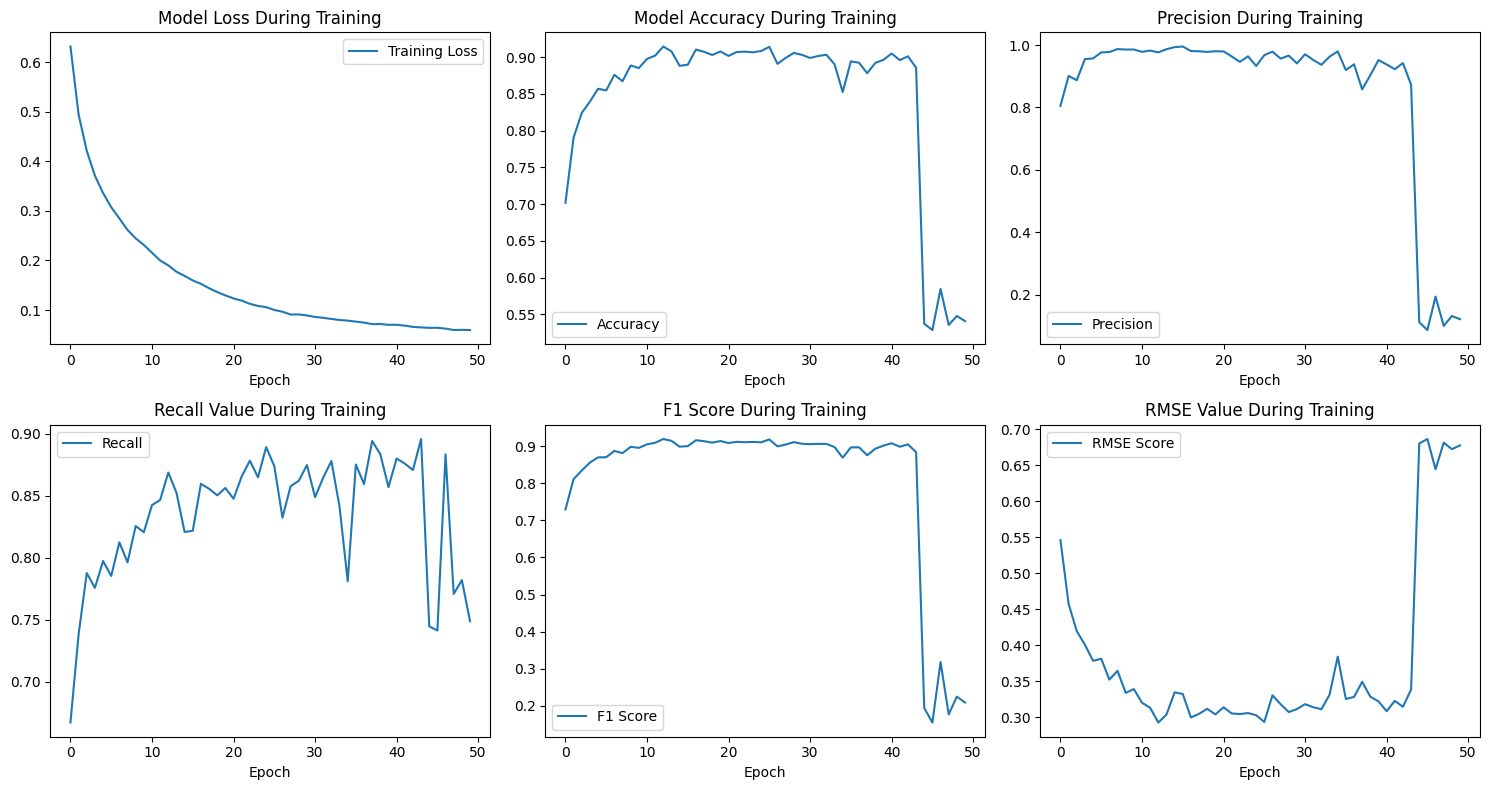

Threshold: 0.47 Number of Epochs: 50 Hidden Channels: 2048 
 ACC: 0.845, Precision: 0.851,Recall: 0.835, F1: 0.811, RMSE: 0.376


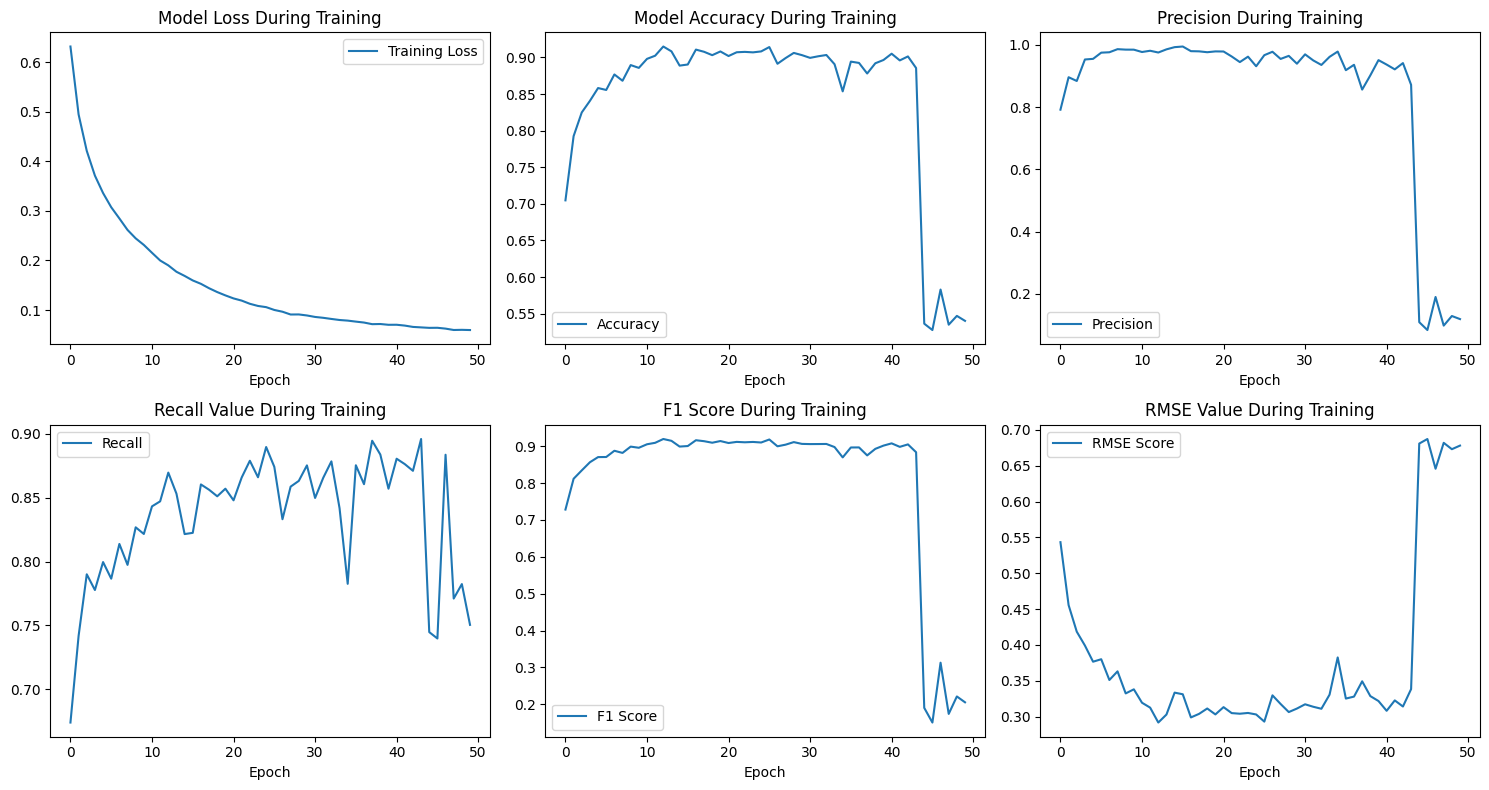

Threshold: 0.5 Number of Epochs: 50 Hidden Channels: 2048 
 ACC: 0.845, Precision: 0.850,Recall: 0.836, F1: 0.810, RMSE: 0.376


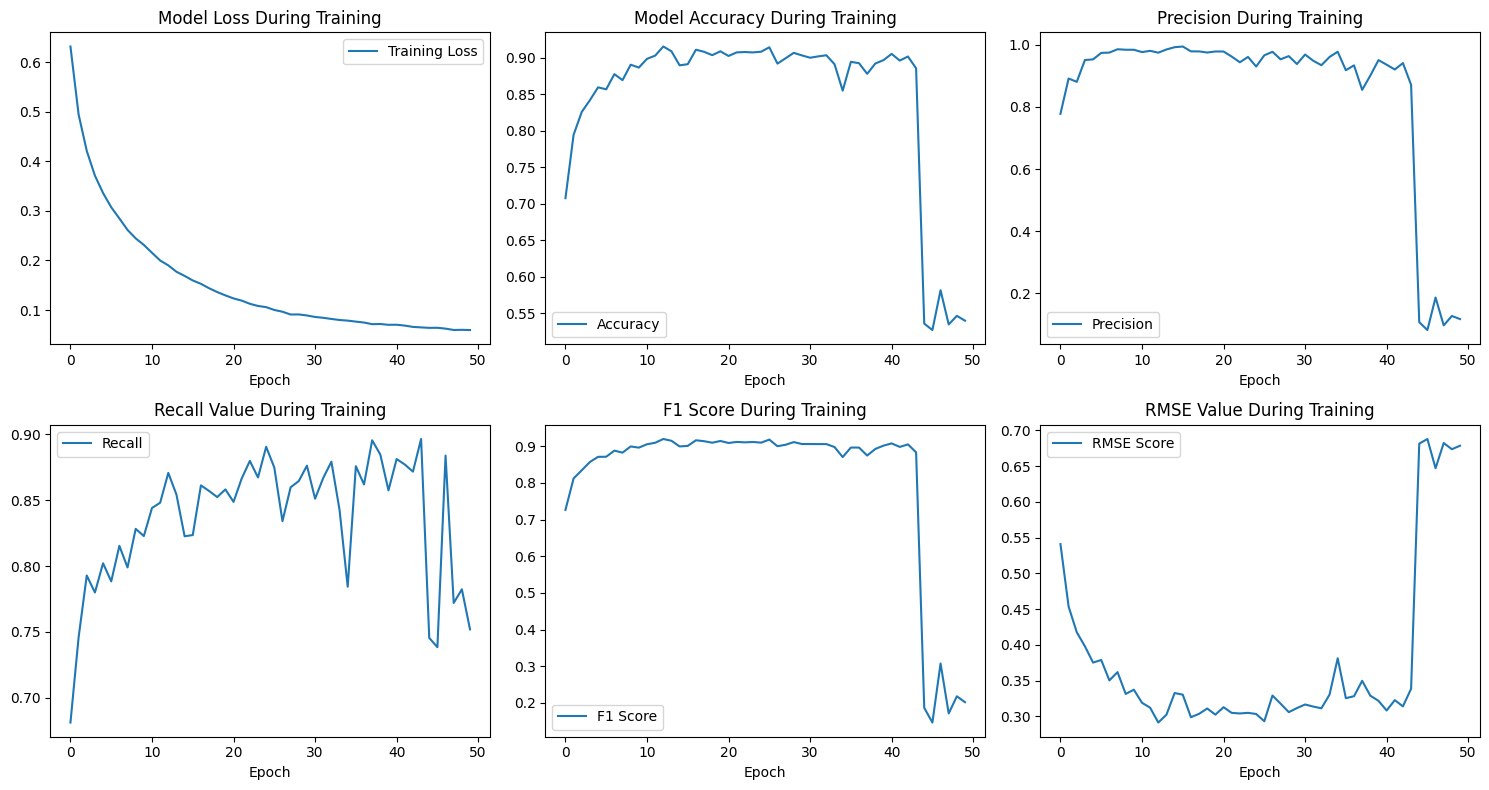

Threshold: 0.44 Number of Epochs: 100 Hidden Channels: 128 
 ACC: 0.770, Precision: 0.626,Recall: 0.884, F1: 0.724, RMSE: 0.475


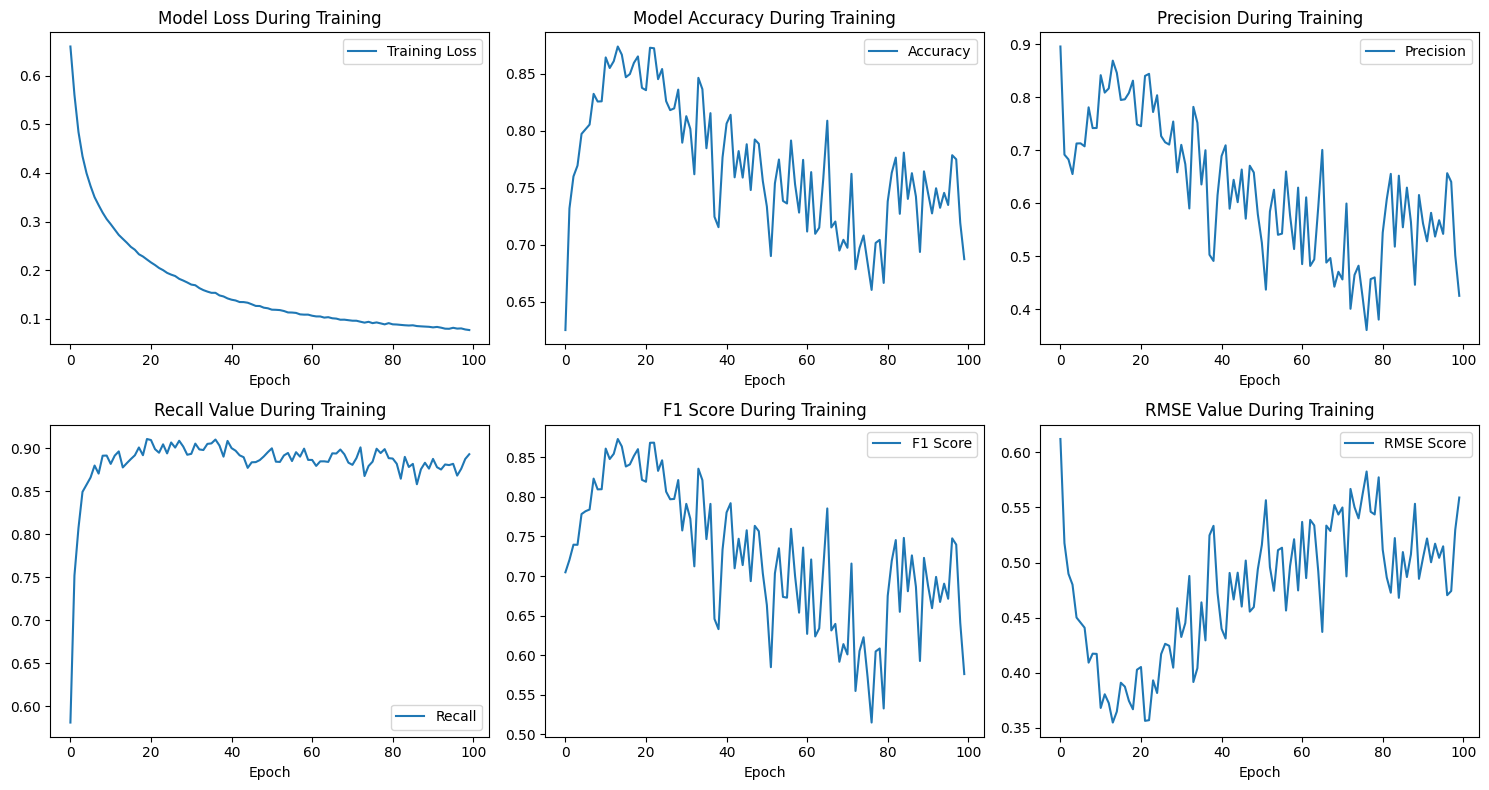

Threshold: 0.47 Number of Epochs: 100 Hidden Channels: 128 
 ACC: 0.769, Precision: 0.621,Recall: 0.884, F1: 0.721, RMSE: 0.477


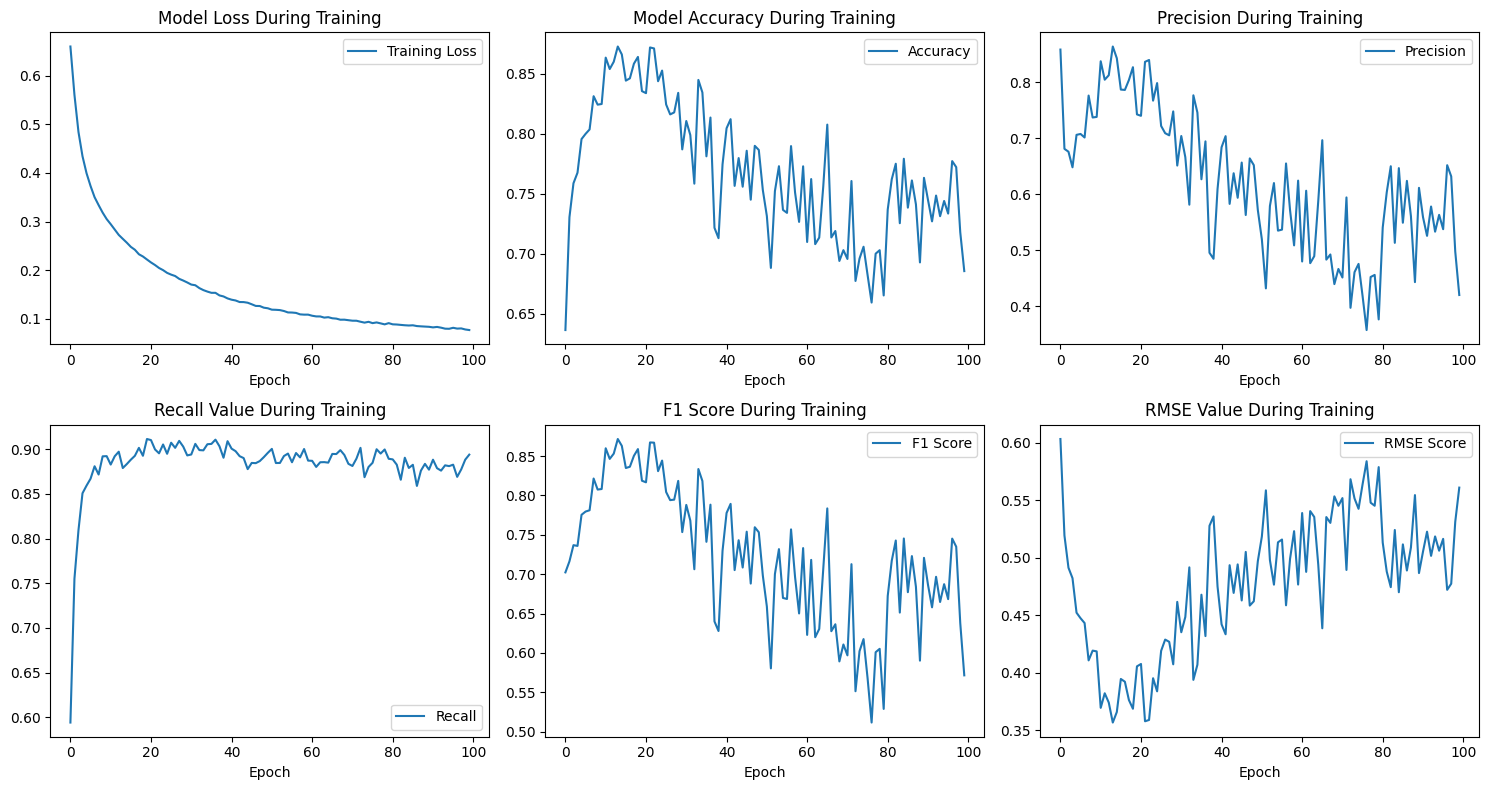

Threshold: 0.5 Number of Epochs: 100 Hidden Channels: 128 
 ACC: 0.767, Precision: 0.615,Recall: 0.885, F1: 0.718, RMSE: 0.479


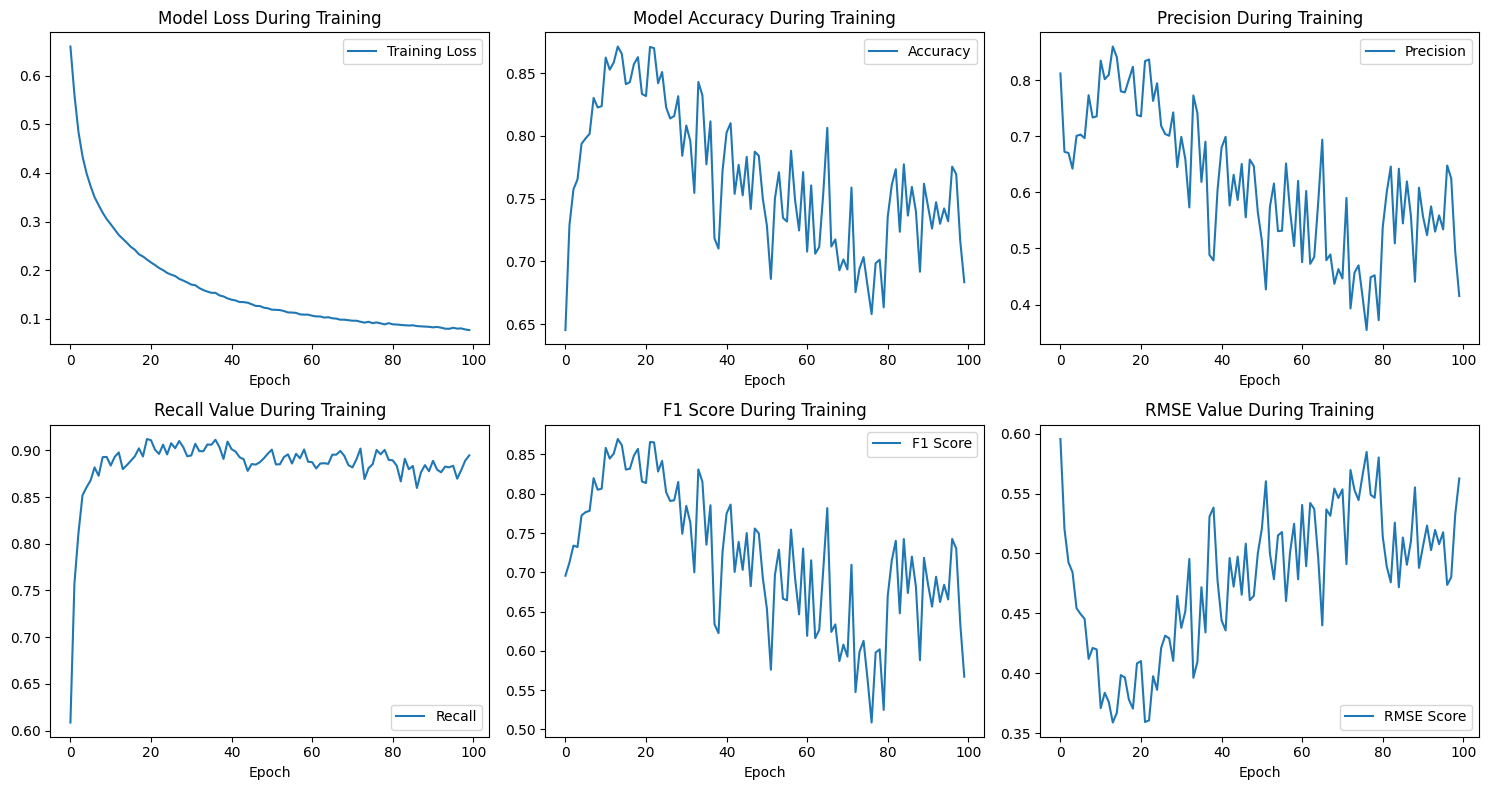

Threshold: 0.44 Number of Epochs: 100 Hidden Channels: 256 
 ACC: 0.859, Precision: 0.806,Recall: 0.904, F1: 0.849, RMSE: 0.373


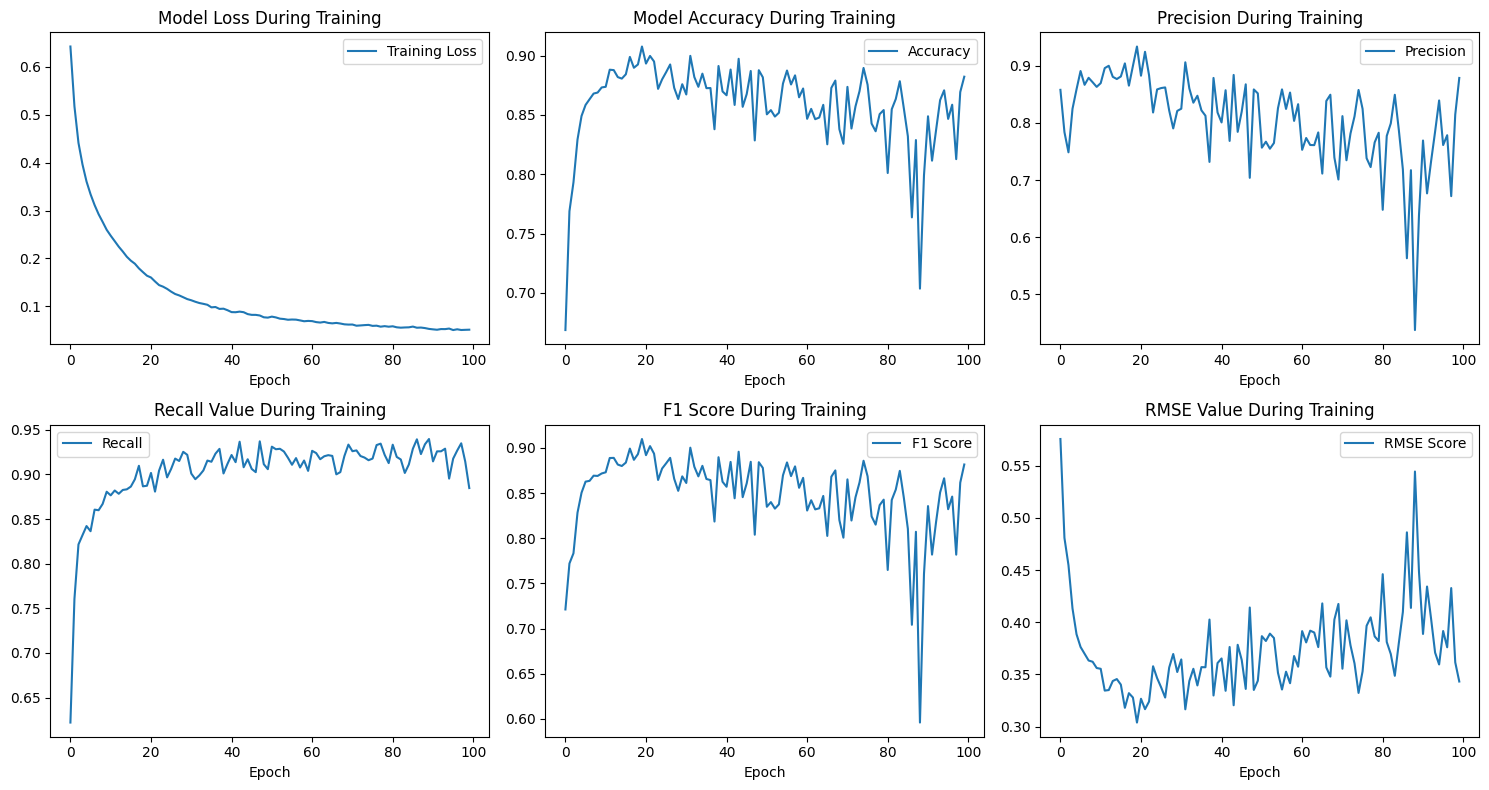

Threshold: 0.47 Number of Epochs: 100 Hidden Channels: 256 
 ACC: 0.858, Precision: 0.804,Recall: 0.905, F1: 0.848, RMSE: 0.374


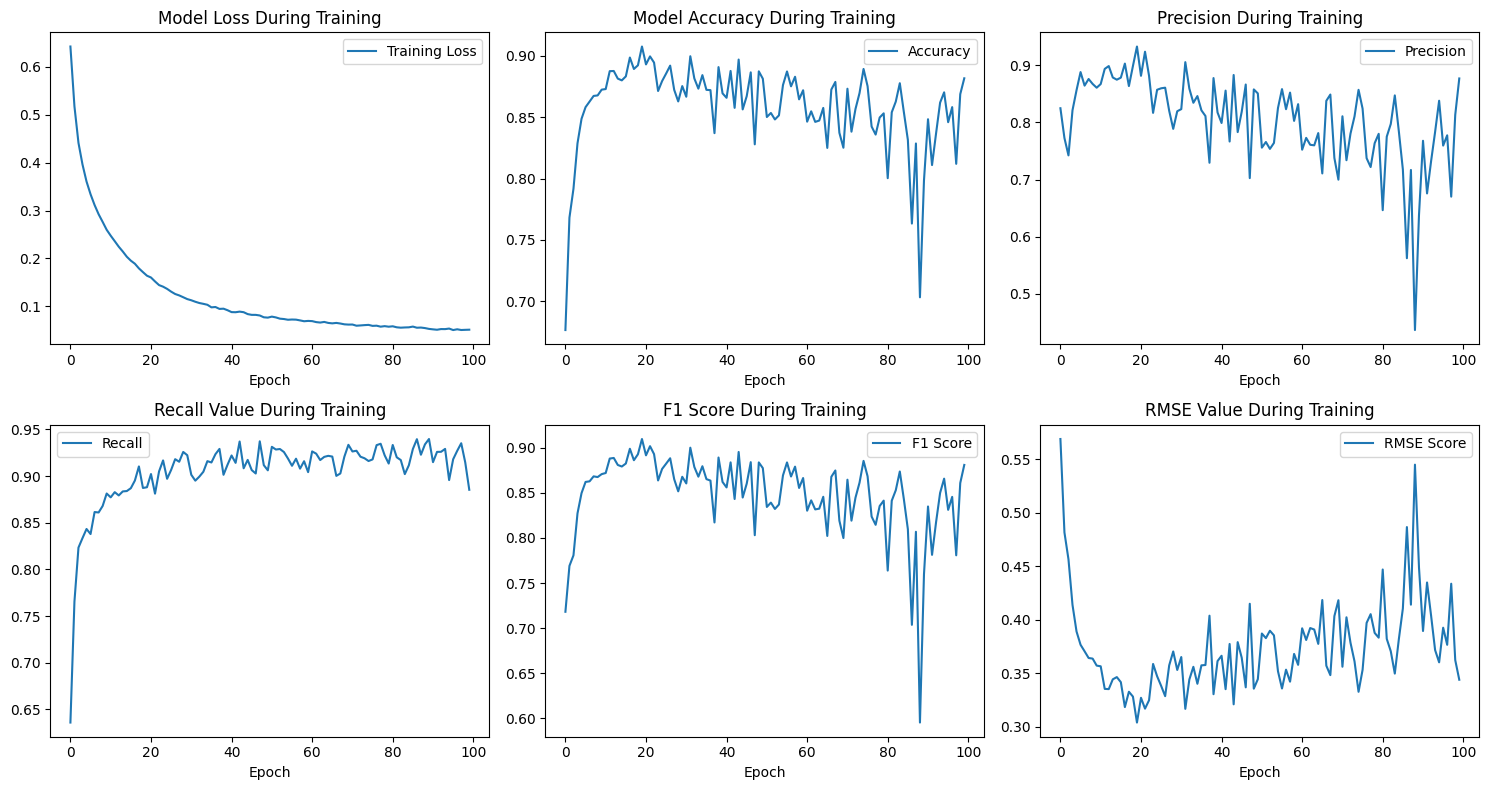

Threshold: 0.5 Number of Epochs: 100 Hidden Channels: 256 
 ACC: 0.858, Precision: 0.802,Recall: 0.905, F1: 0.847, RMSE: 0.375


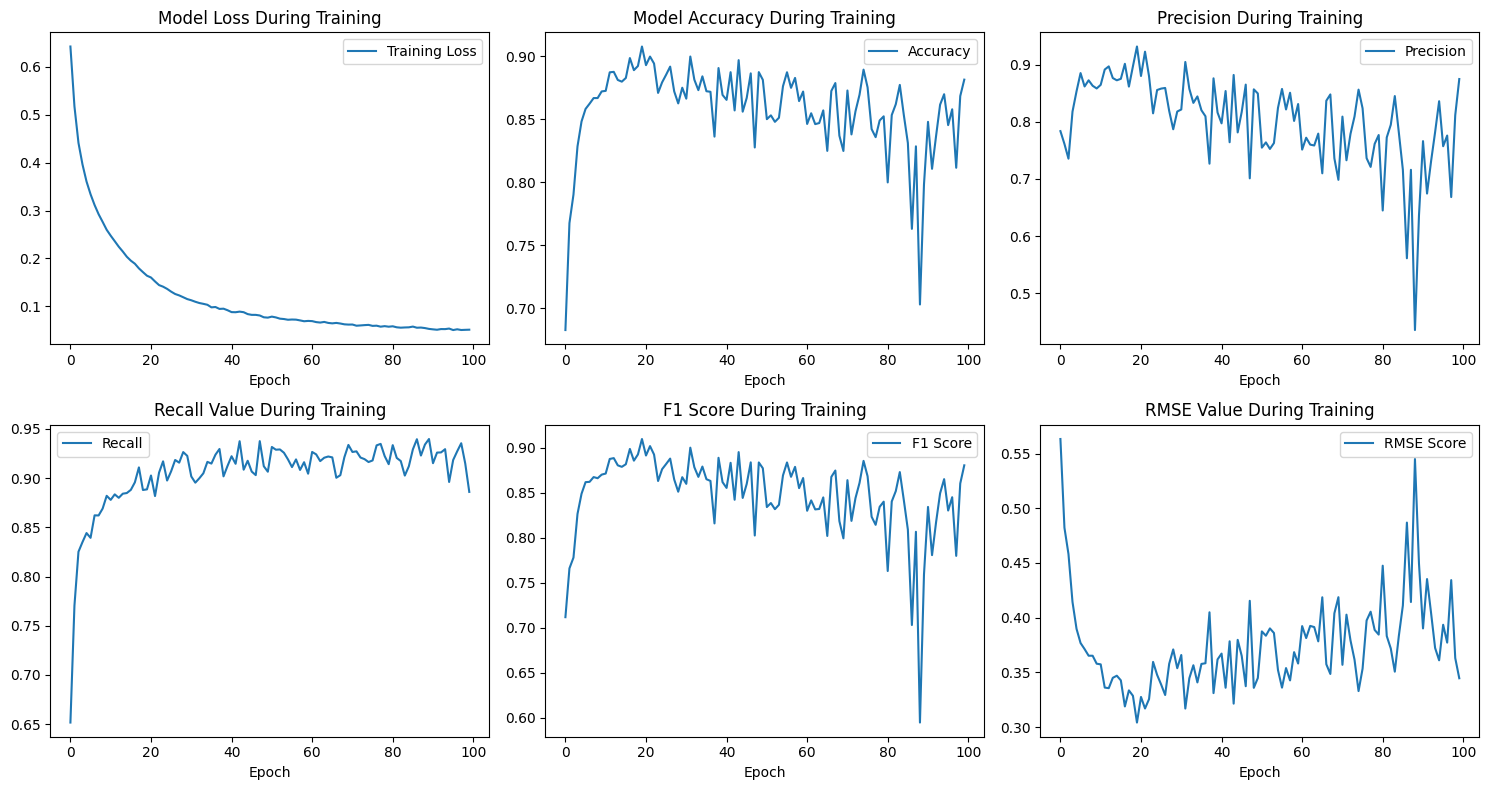

Threshold: 0.44 Number of Epochs: 100 Hidden Channels: 1024 
 ACC: 0.840, Precision: 0.789,Recall: 0.884, F1: 0.817, RMSE: 0.391


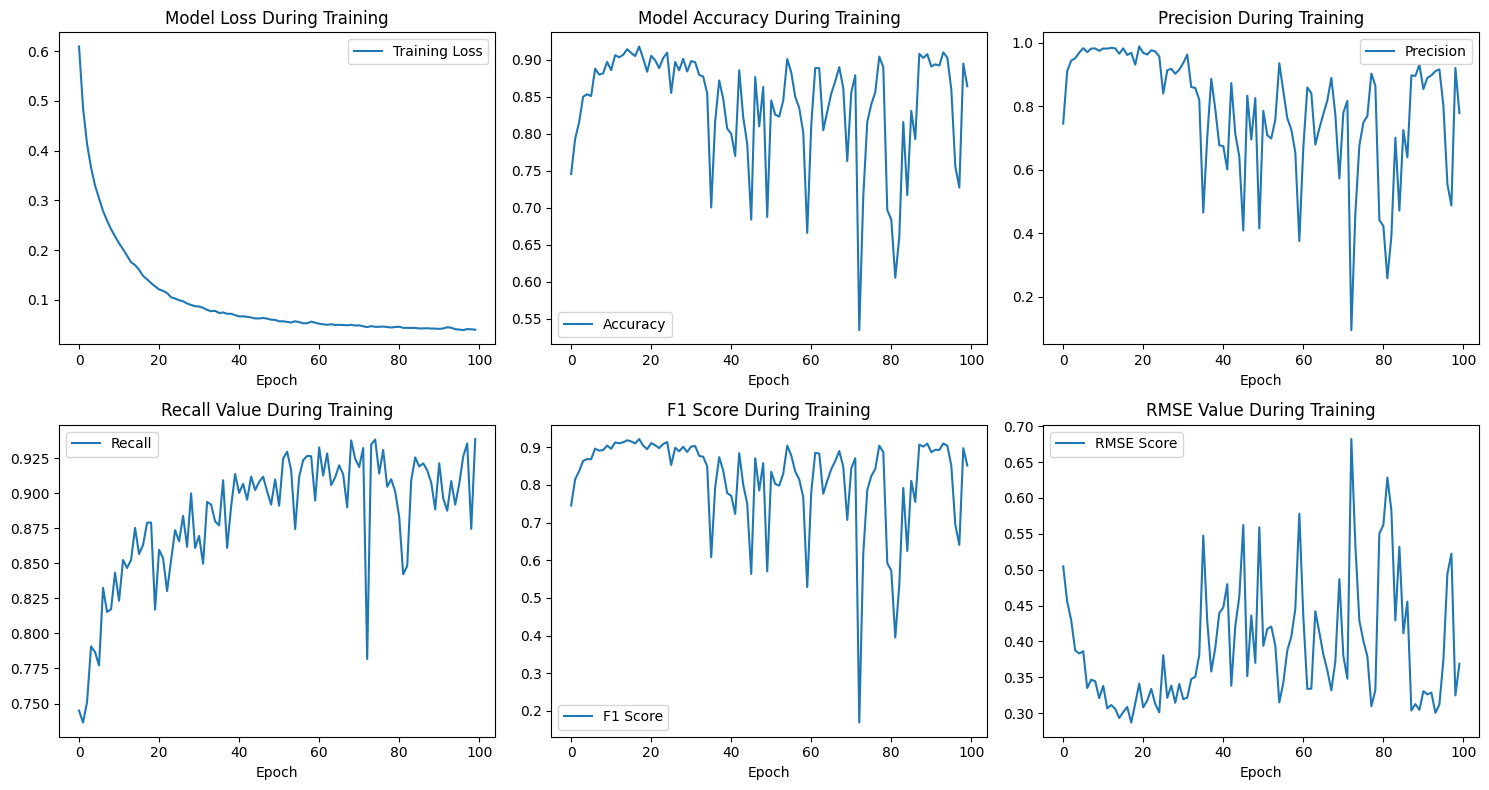

Threshold: 0.47 Number of Epochs: 100 Hidden Channels: 1024 
 ACC: 0.839, Precision: 0.786,Recall: 0.885, F1: 0.816, RMSE: 0.392


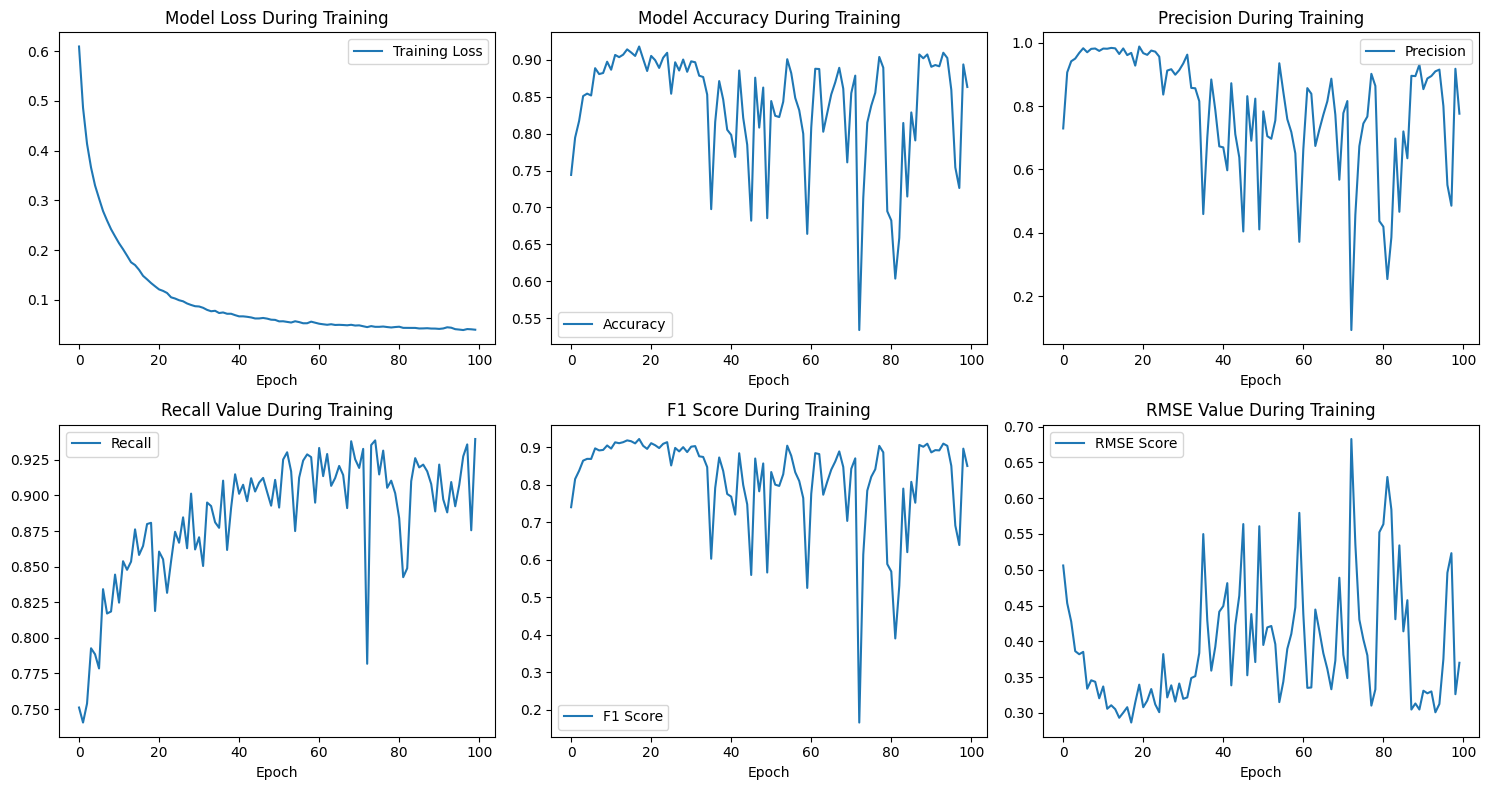

Threshold: 0.5 Number of Epochs: 100 Hidden Channels: 1024 
 ACC: 0.838, Precision: 0.783,Recall: 0.886, F1: 0.815, RMSE: 0.393


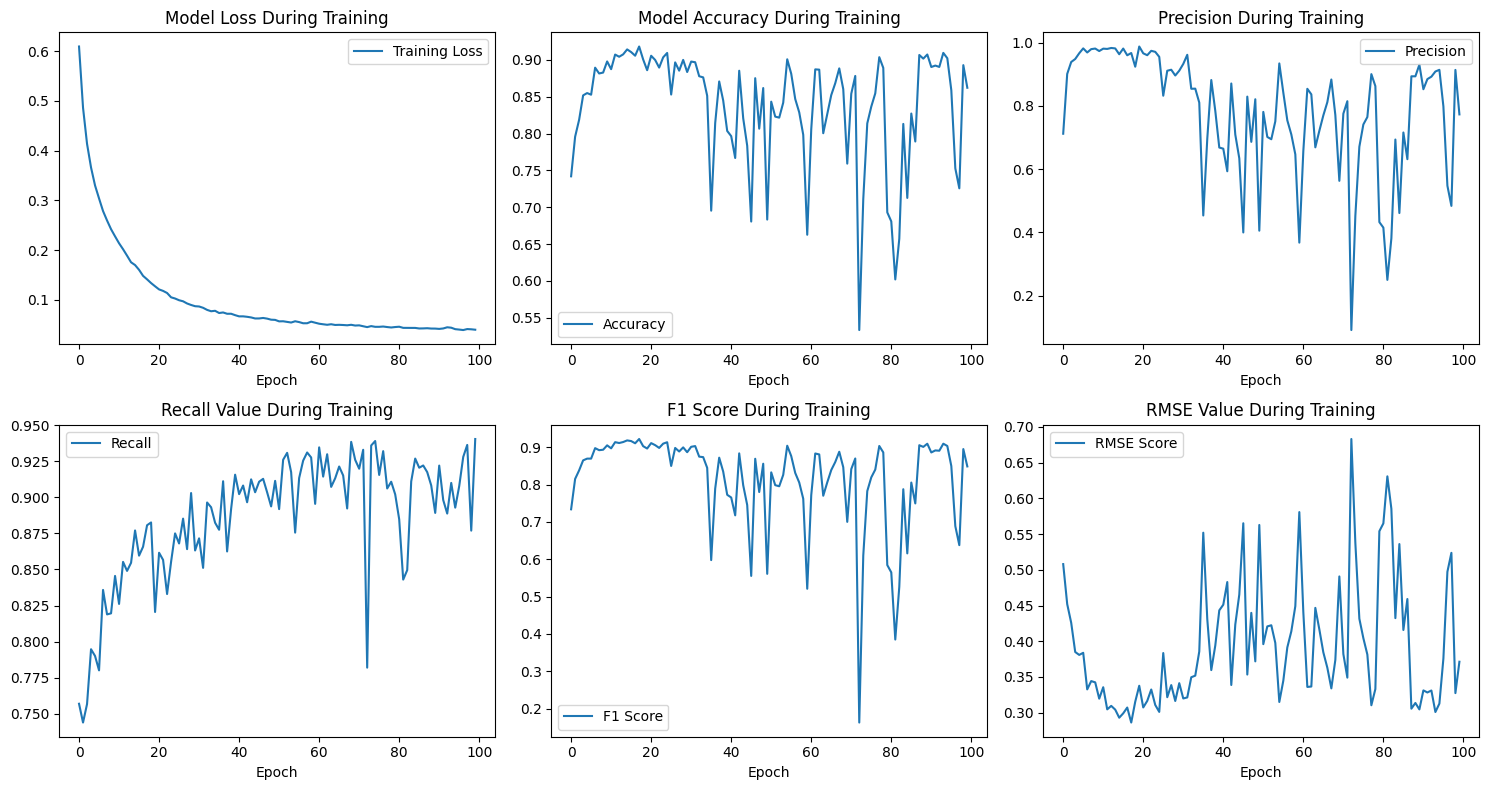

Threshold: 0.44 Number of Epochs: 100 Hidden Channels: 2048 
 ACC: 0.782, Precision: 0.658,Recall: 0.882, F1: 0.714, RMSE: 0.453


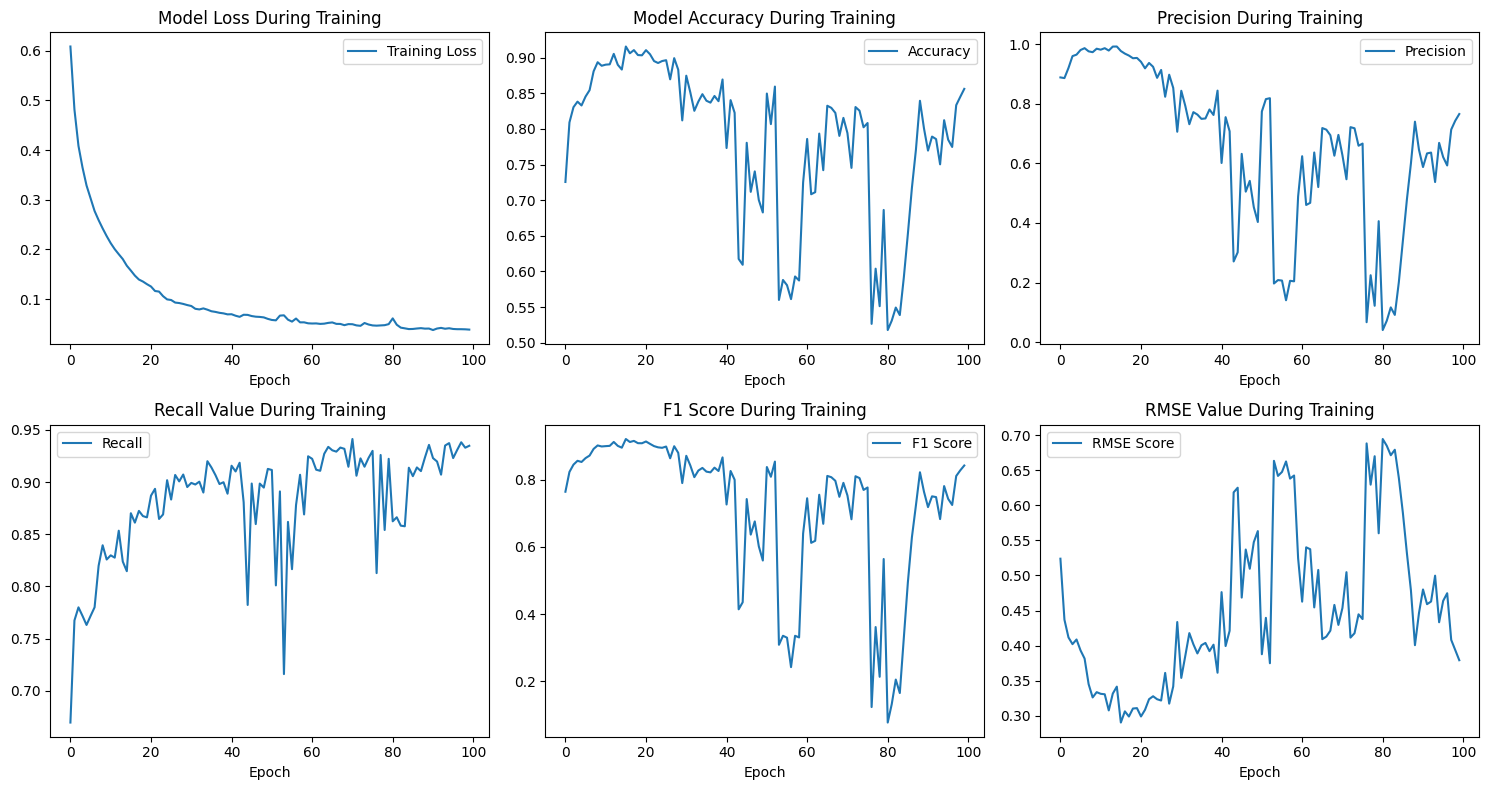

Threshold: 0.47 Number of Epochs: 100 Hidden Channels: 2048 
 ACC: 0.782, Precision: 0.656,Recall: 0.882, F1: 0.713, RMSE: 0.454


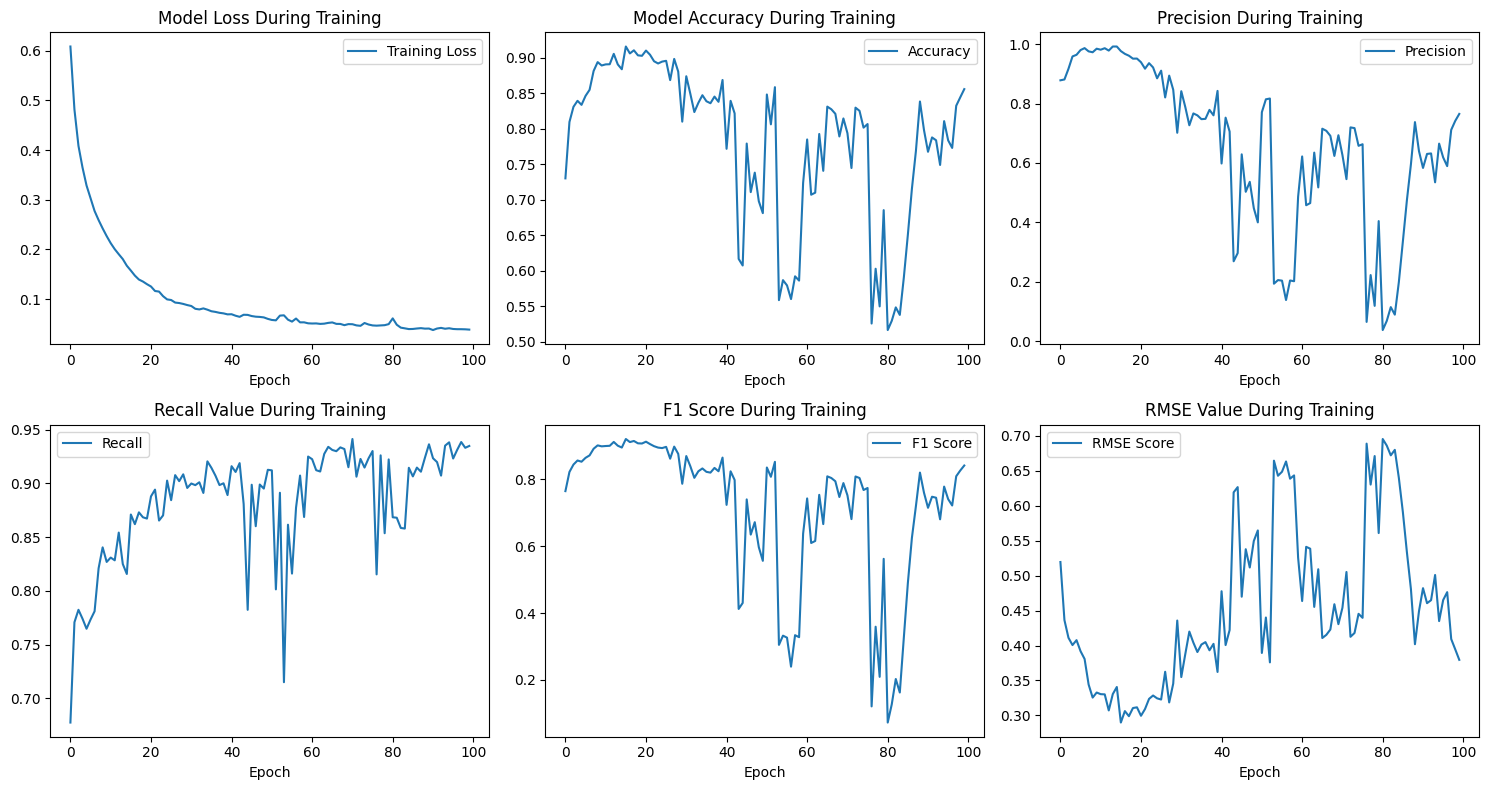

Threshold: 0.5 Number of Epochs: 100 Hidden Channels: 2048 
 ACC: 0.781, Precision: 0.653,Recall: 0.883, F1: 0.711, RMSE: 0.455


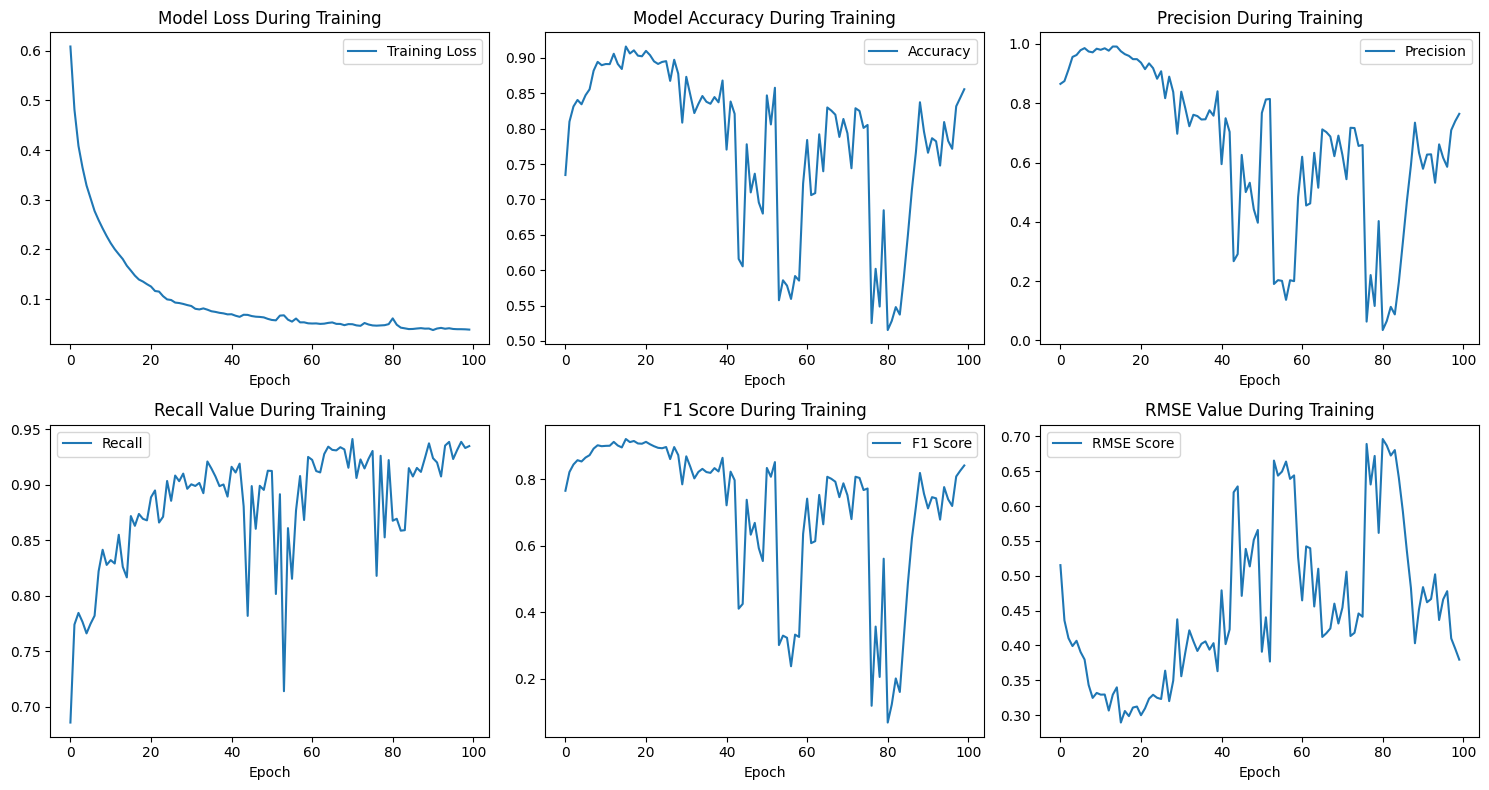

Threshold: 0.44 Number of Epochs: 125 Hidden Channels: 128 
 ACC: 0.800, Precision: 0.683,Recall: 0.892, F1: 0.770, RMSE: 0.445


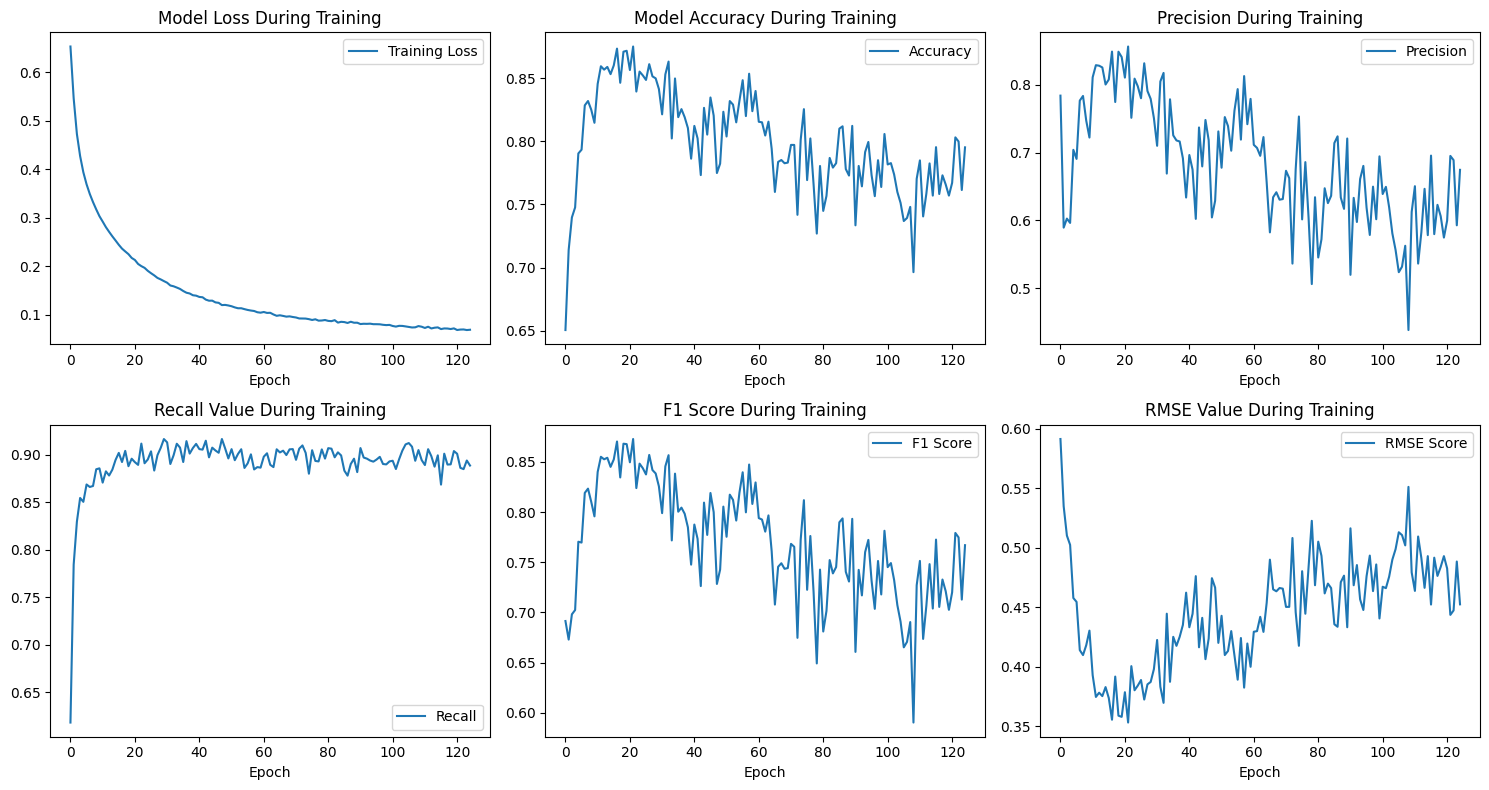

Threshold: 0.47 Number of Epochs: 125 Hidden Channels: 128 
 ACC: 0.799, Precision: 0.680,Recall: 0.893, F1: 0.768, RMSE: 0.446


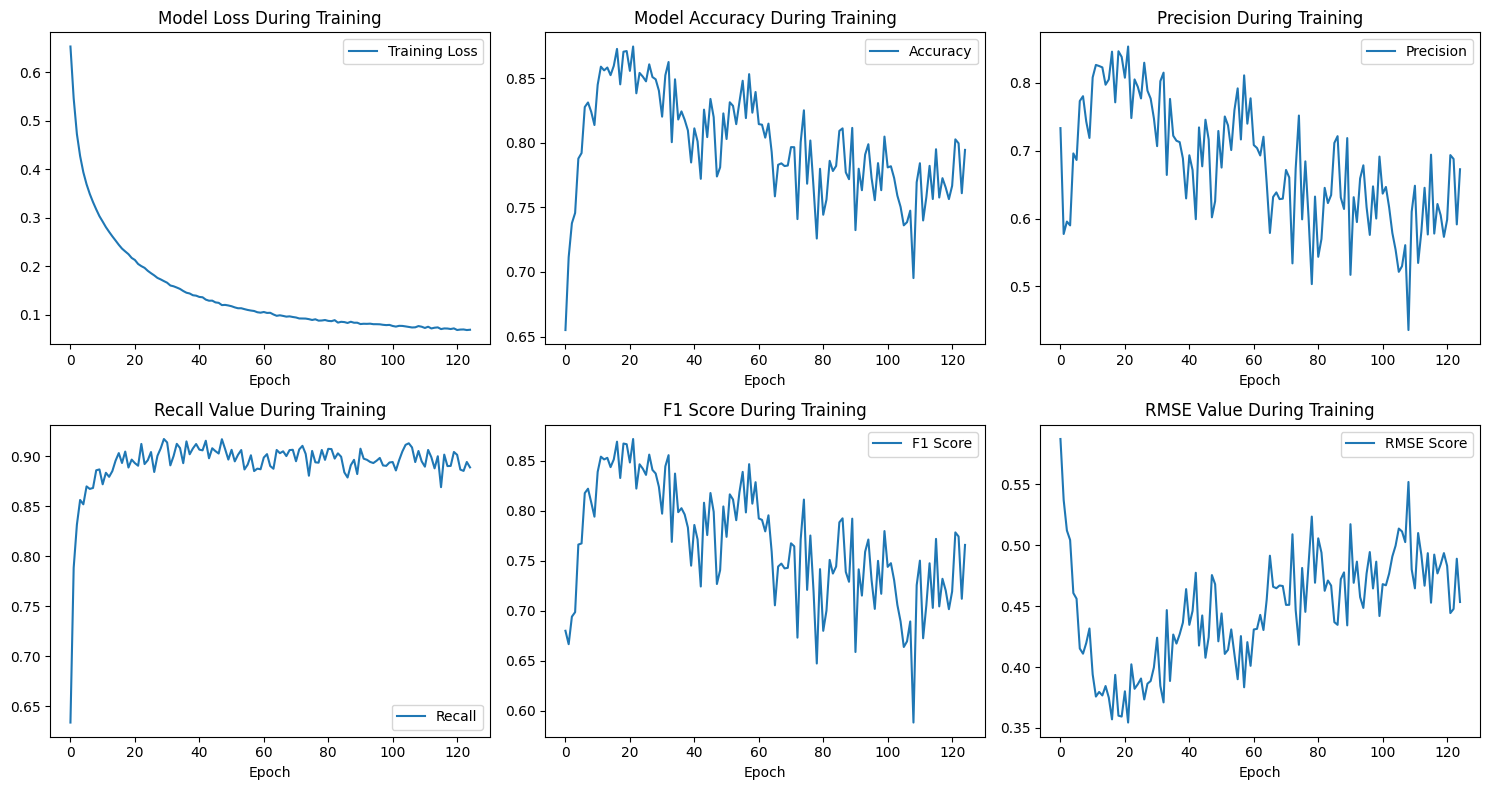

Threshold: 0.5 Number of Epochs: 125 Hidden Channels: 128 
 ACC: 0.798, Precision: 0.677,Recall: 0.893, F1: 0.767, RMSE: 0.447


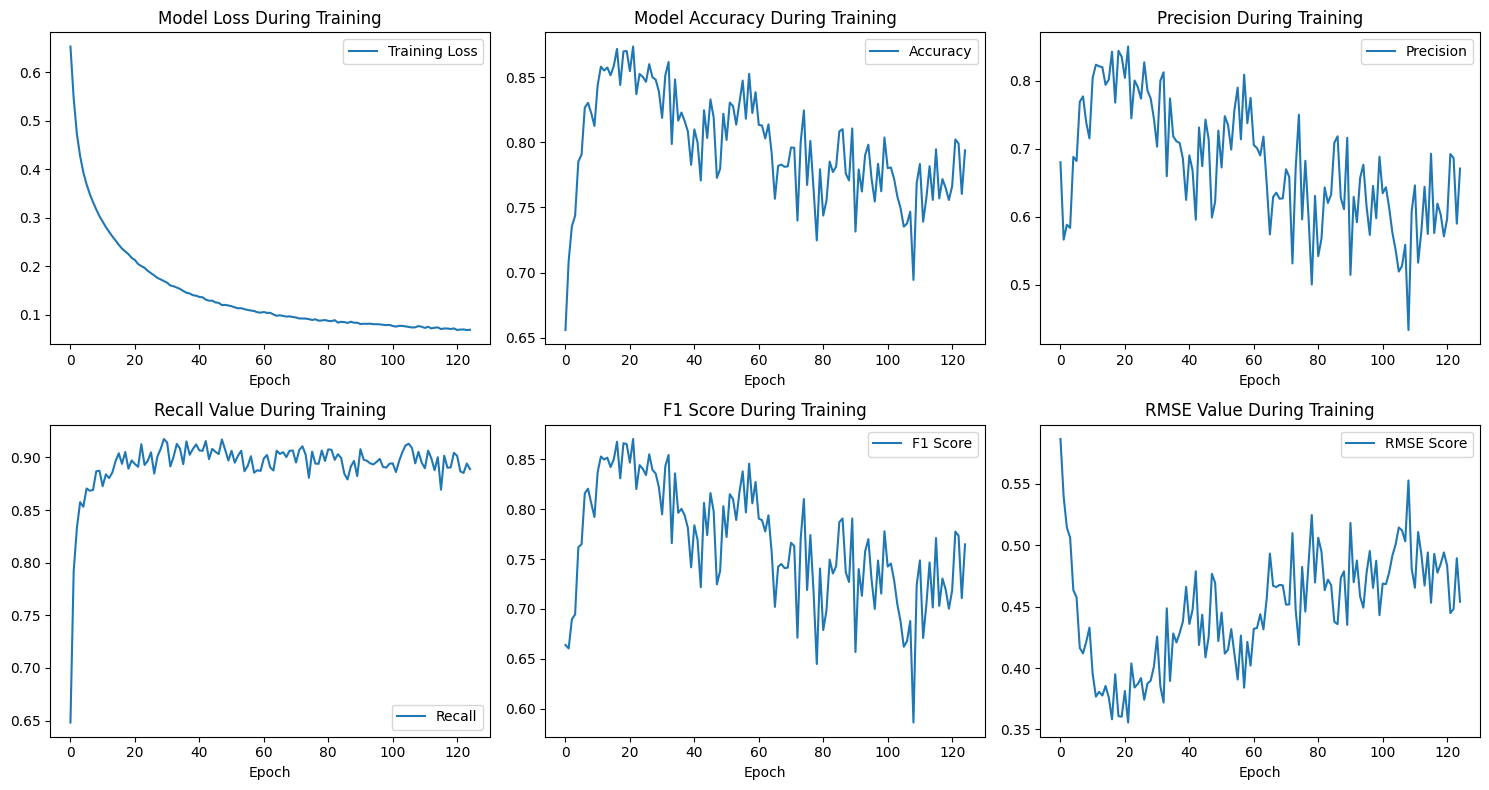

Threshold: 0.44 Number of Epochs: 125 Hidden Channels: 256 
 ACC: 0.857, Precision: 0.815,Recall: 0.891, F1: 0.849, RMSE: 0.376


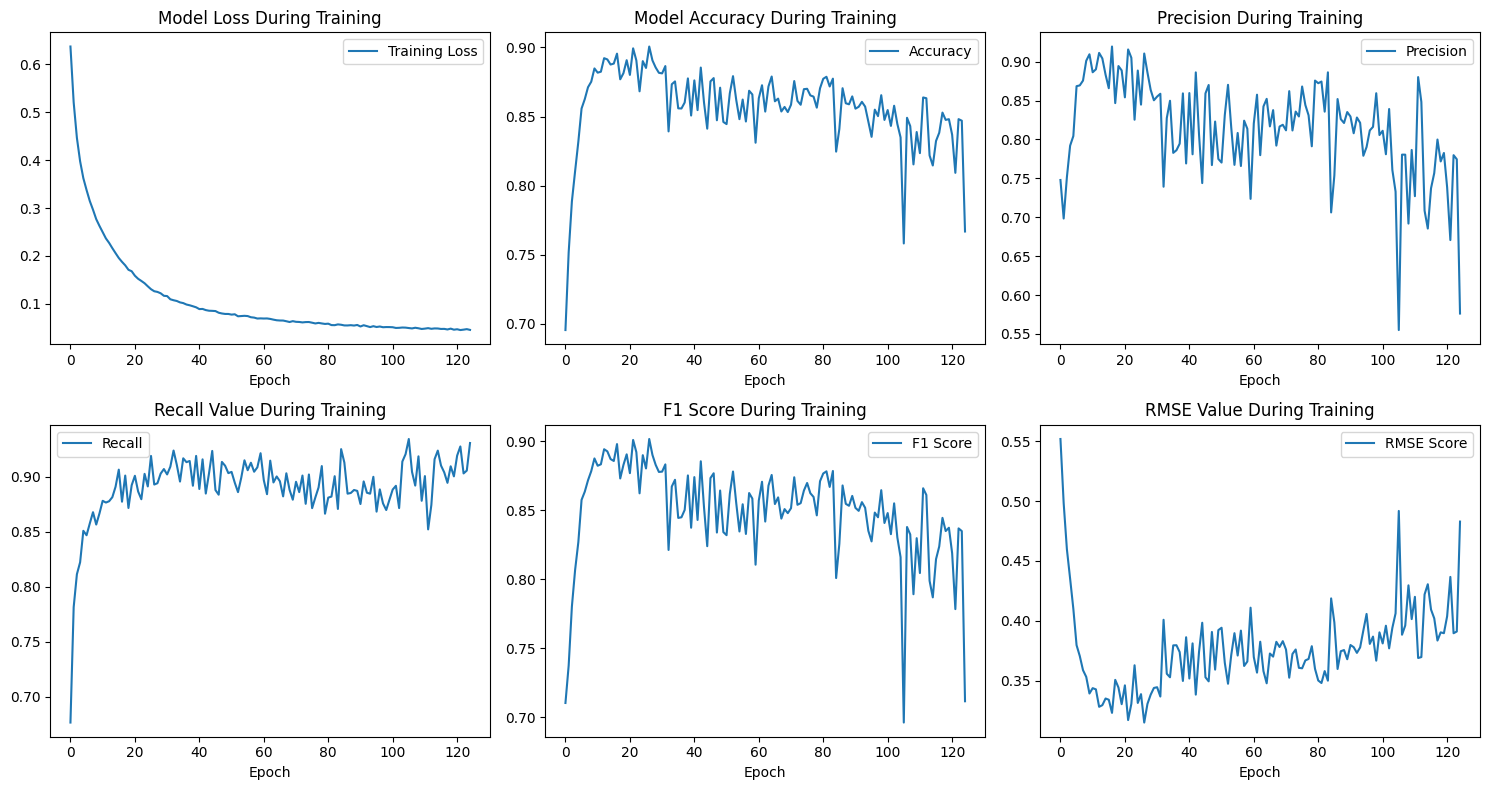

Threshold: 0.47 Number of Epochs: 125 Hidden Channels: 256 
 ACC: 0.856, Precision: 0.813,Recall: 0.892, F1: 0.849, RMSE: 0.377


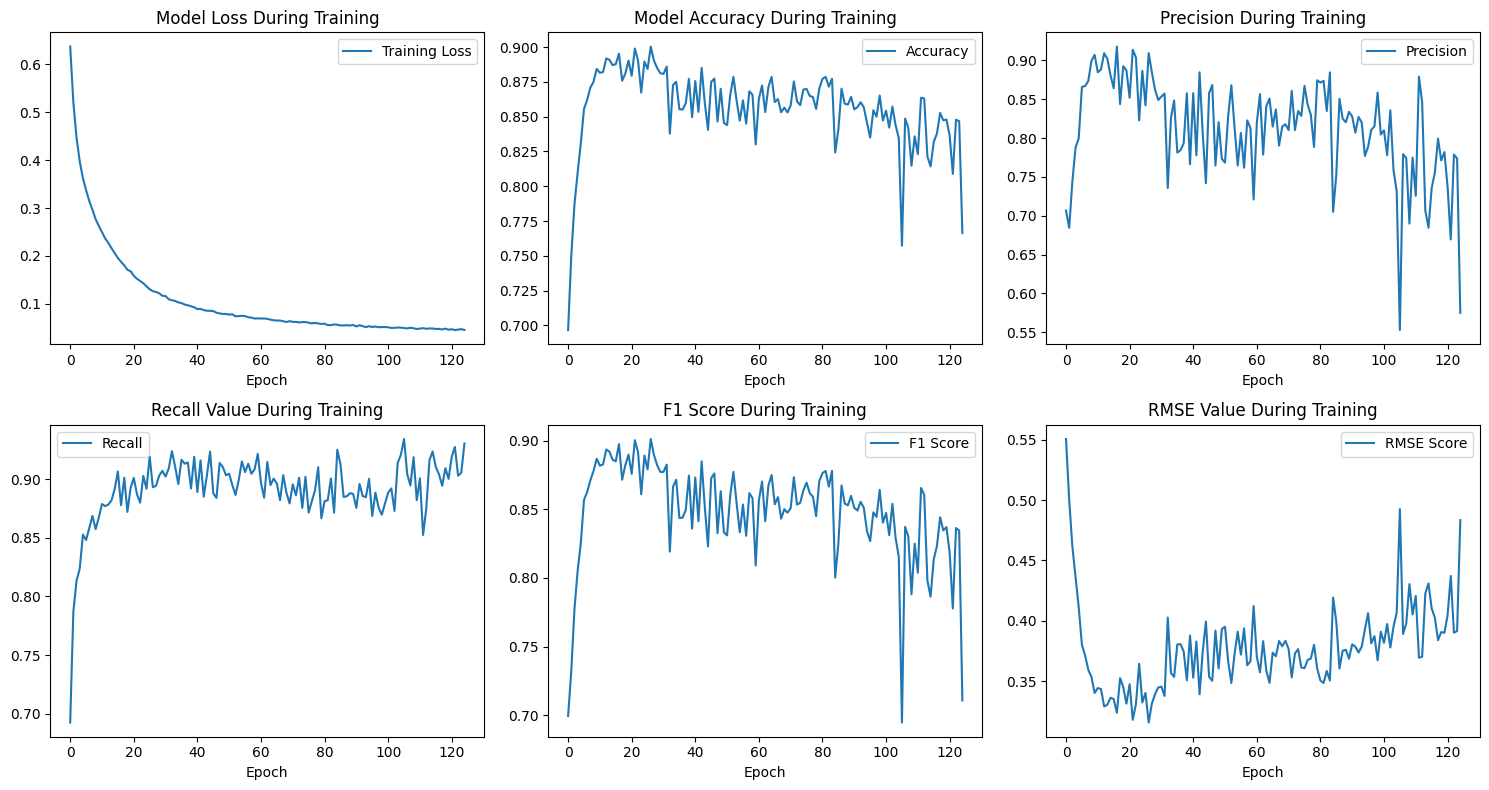

Threshold: 0.5 Number of Epochs: 125 Hidden Channels: 256 
 ACC: 0.856, Precision: 0.811,Recall: 0.892, F1: 0.848, RMSE: 0.378


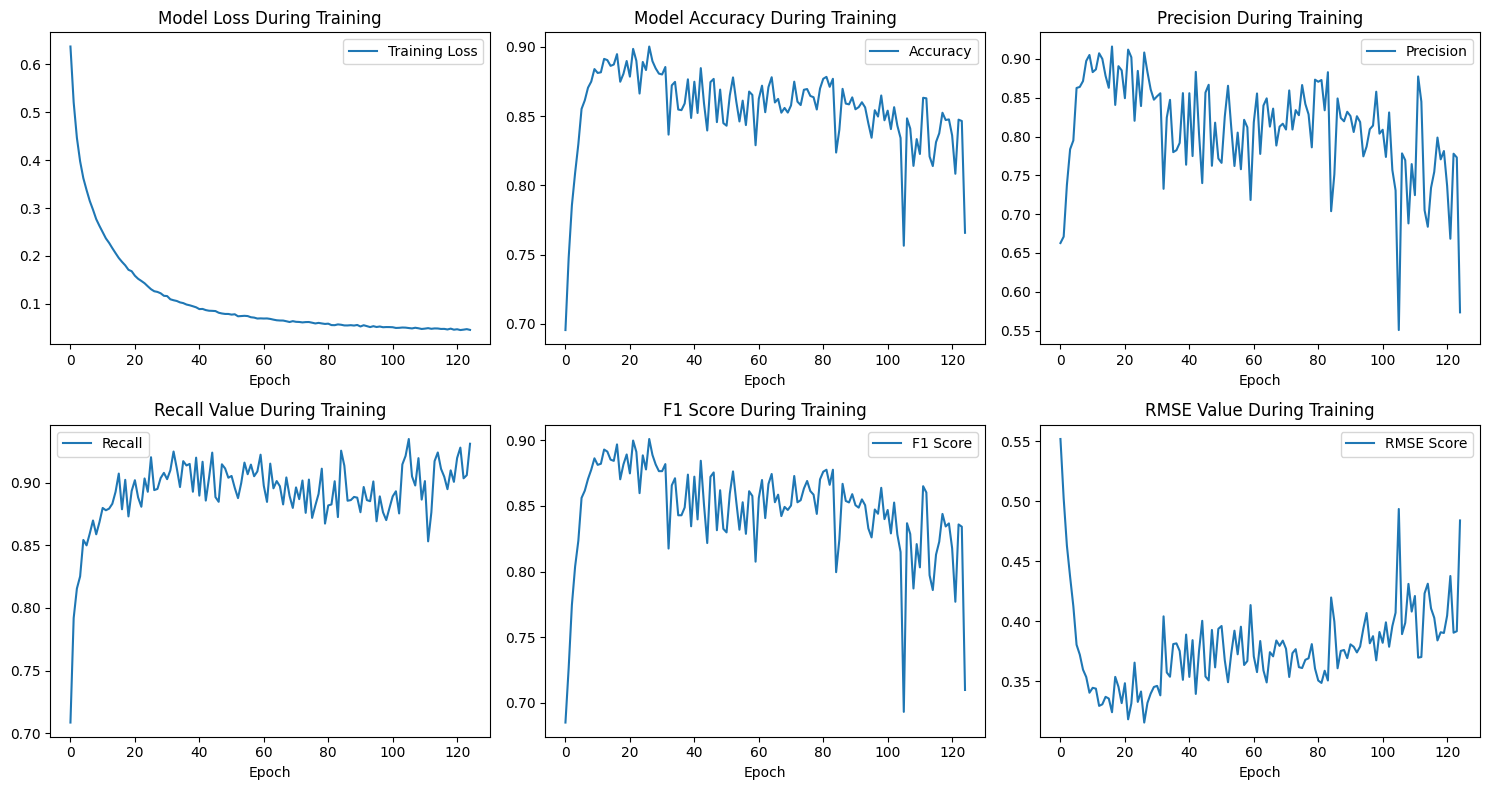

Threshold: 0.44 Number of Epochs: 125 Hidden Channels: 1024 
 ACC: 0.863, Precision: 0.822,Recall: 0.900, F1: 0.852, RMSE: 0.366


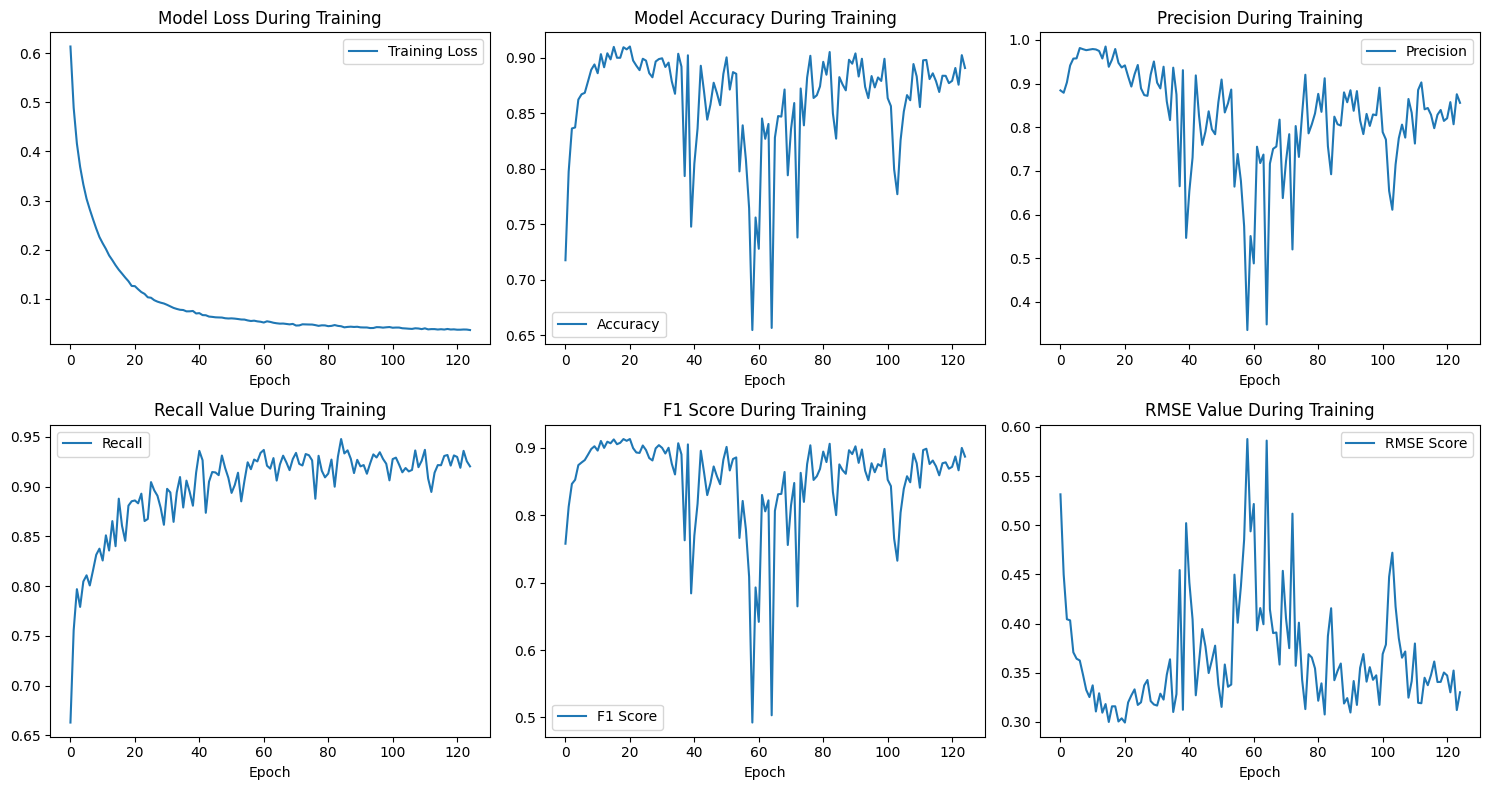

Threshold: 0.47 Number of Epochs: 125 Hidden Channels: 1024 
 ACC: 0.862, Precision: 0.820,Recall: 0.901, F1: 0.851, RMSE: 0.367


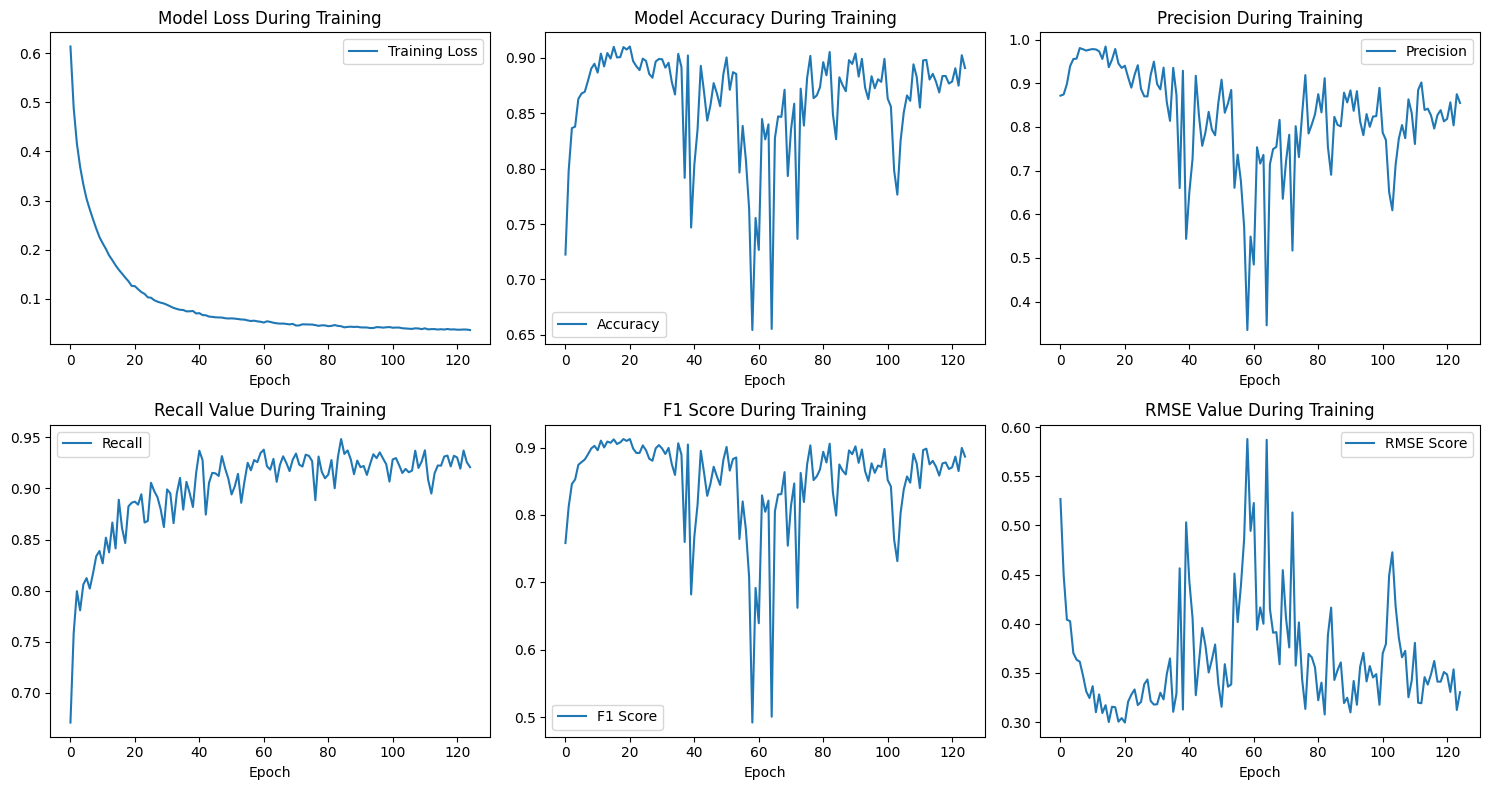

Threshold: 0.5 Number of Epochs: 125 Hidden Channels: 1024 
 ACC: 0.862, Precision: 0.818,Recall: 0.902, F1: 0.851, RMSE: 0.367


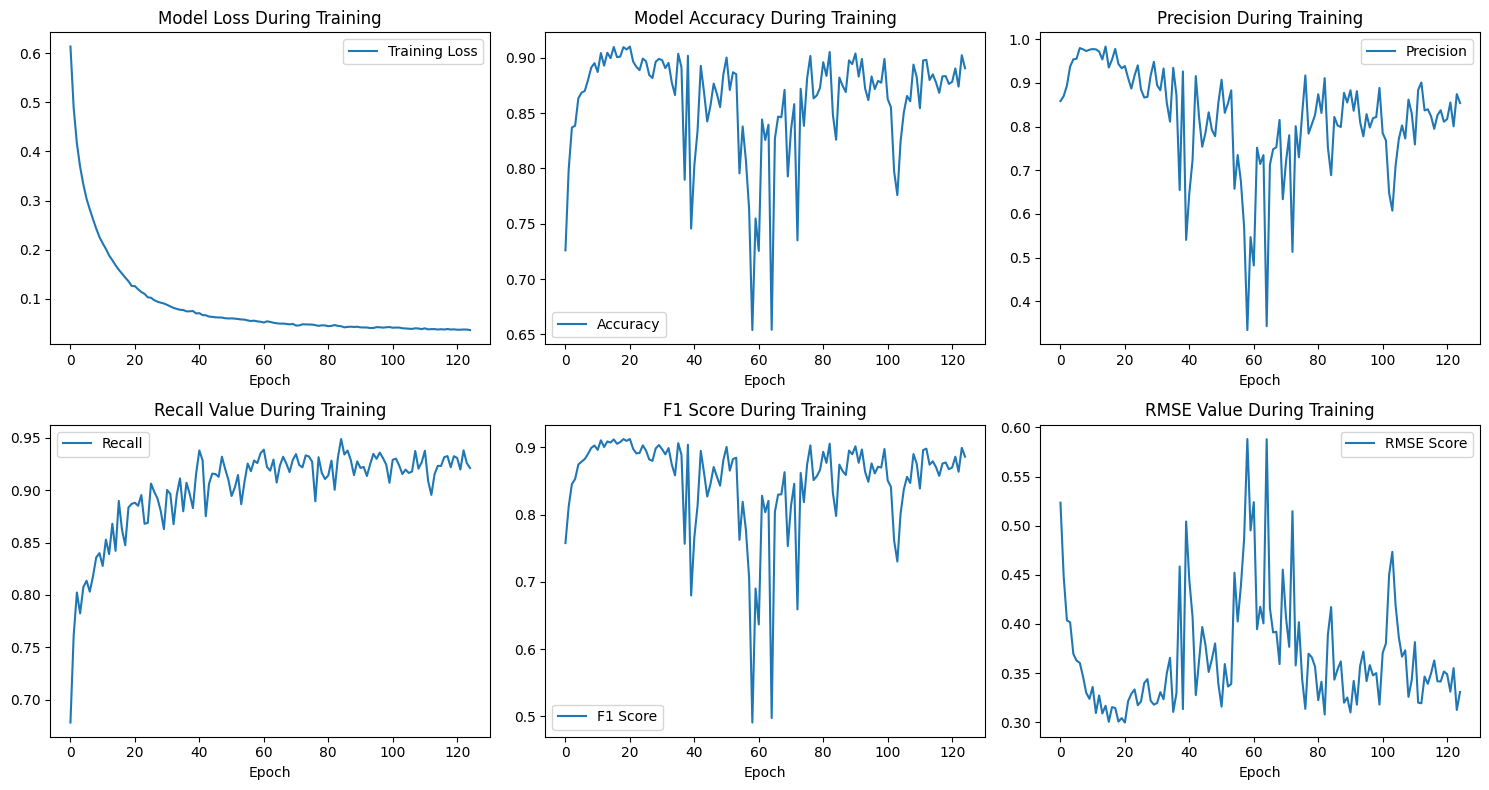

Threshold: 0.44 Number of Epochs: 125 Hidden Channels: 2048 
 ACC: 0.802, Precision: 0.697,Recall: 0.873, F1: 0.743, RMSE: 0.430


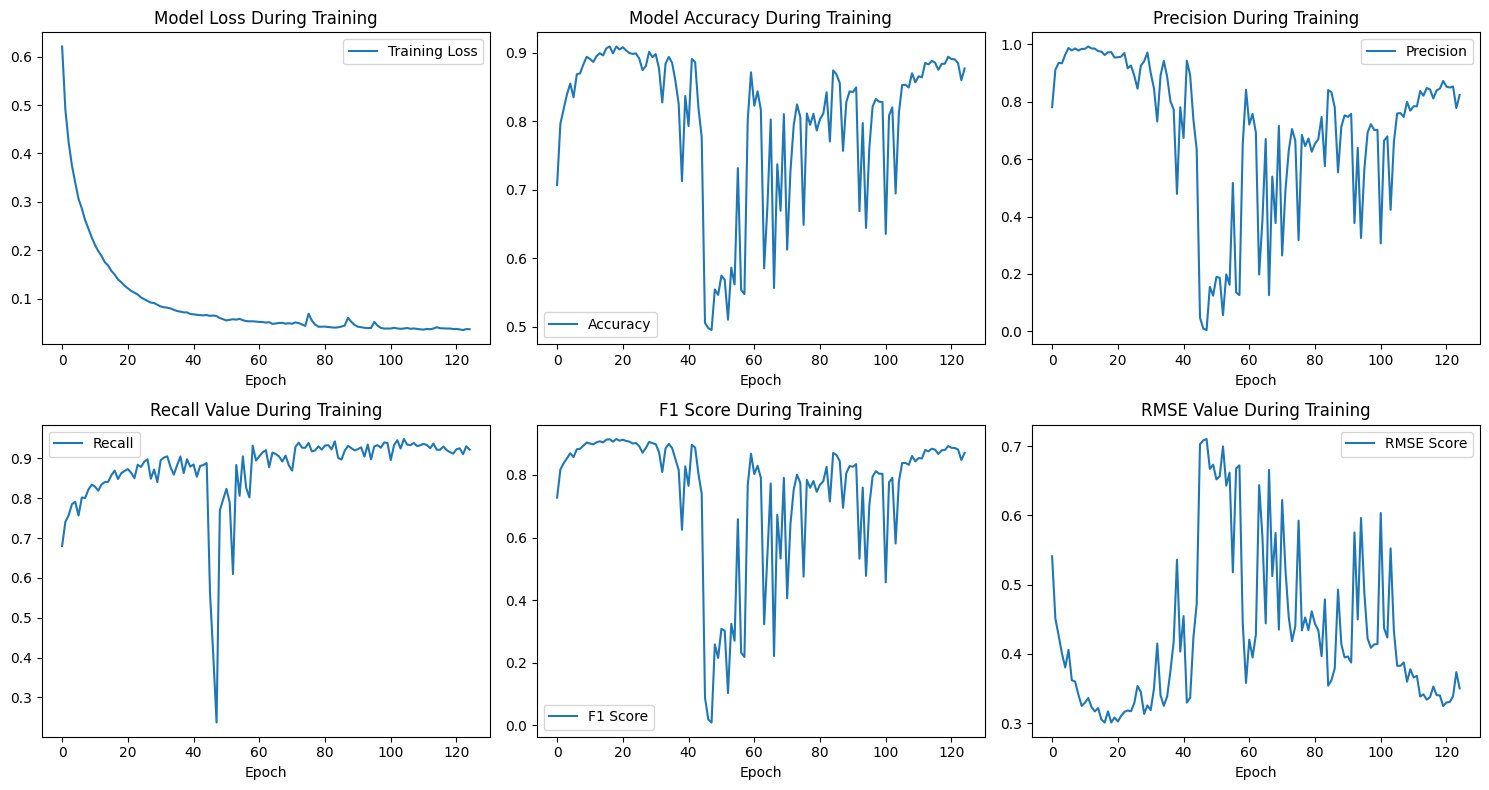

Threshold: 0.47 Number of Epochs: 125 Hidden Channels: 2048 
 ACC: 0.802, Precision: 0.695,Recall: 0.874, F1: 0.743, RMSE: 0.431


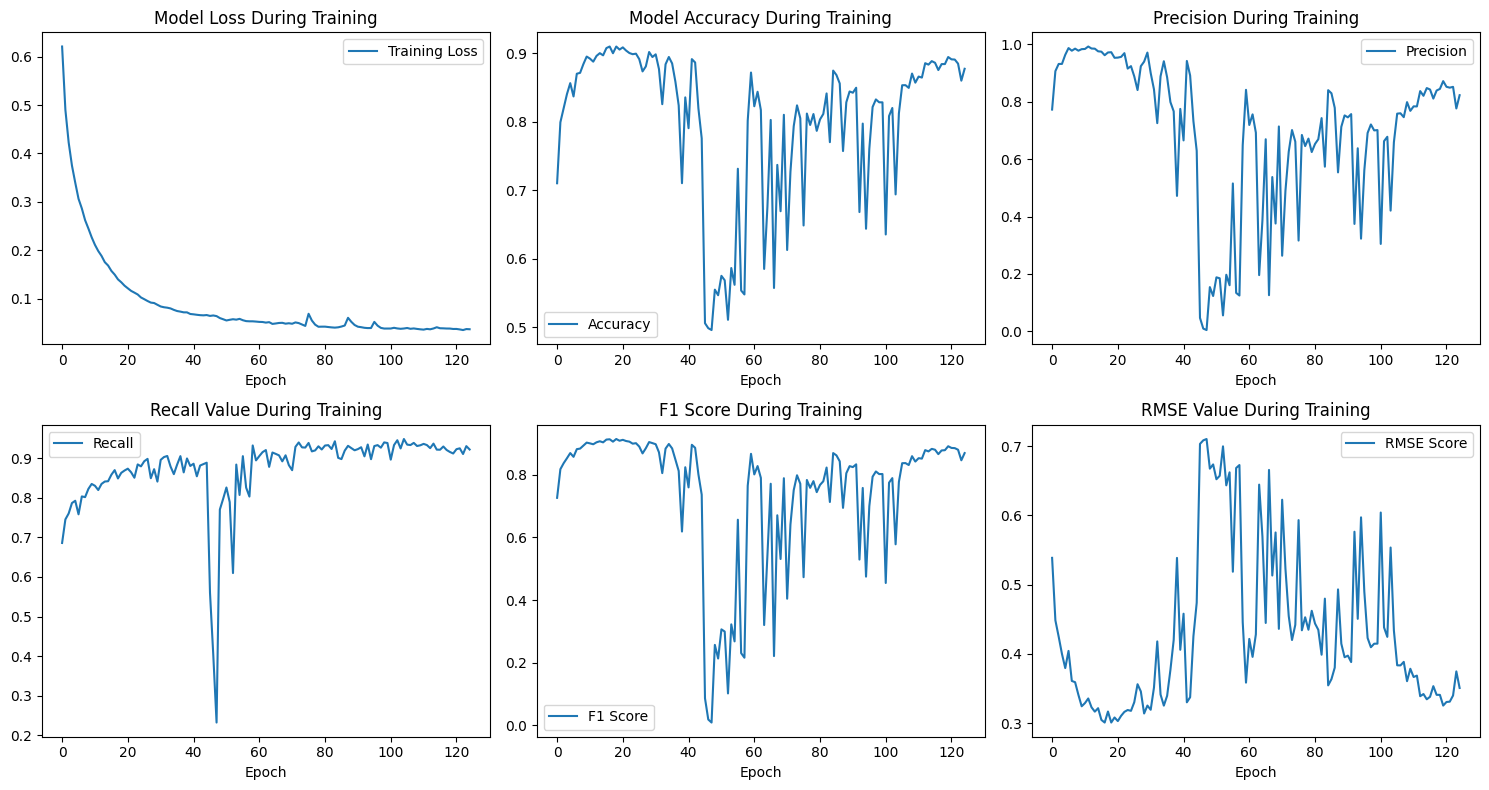

Threshold: 0.5 Number of Epochs: 125 Hidden Channels: 2048 
 ACC: 0.801, Precision: 0.693,Recall: 0.875, F1: 0.742, RMSE: 0.431


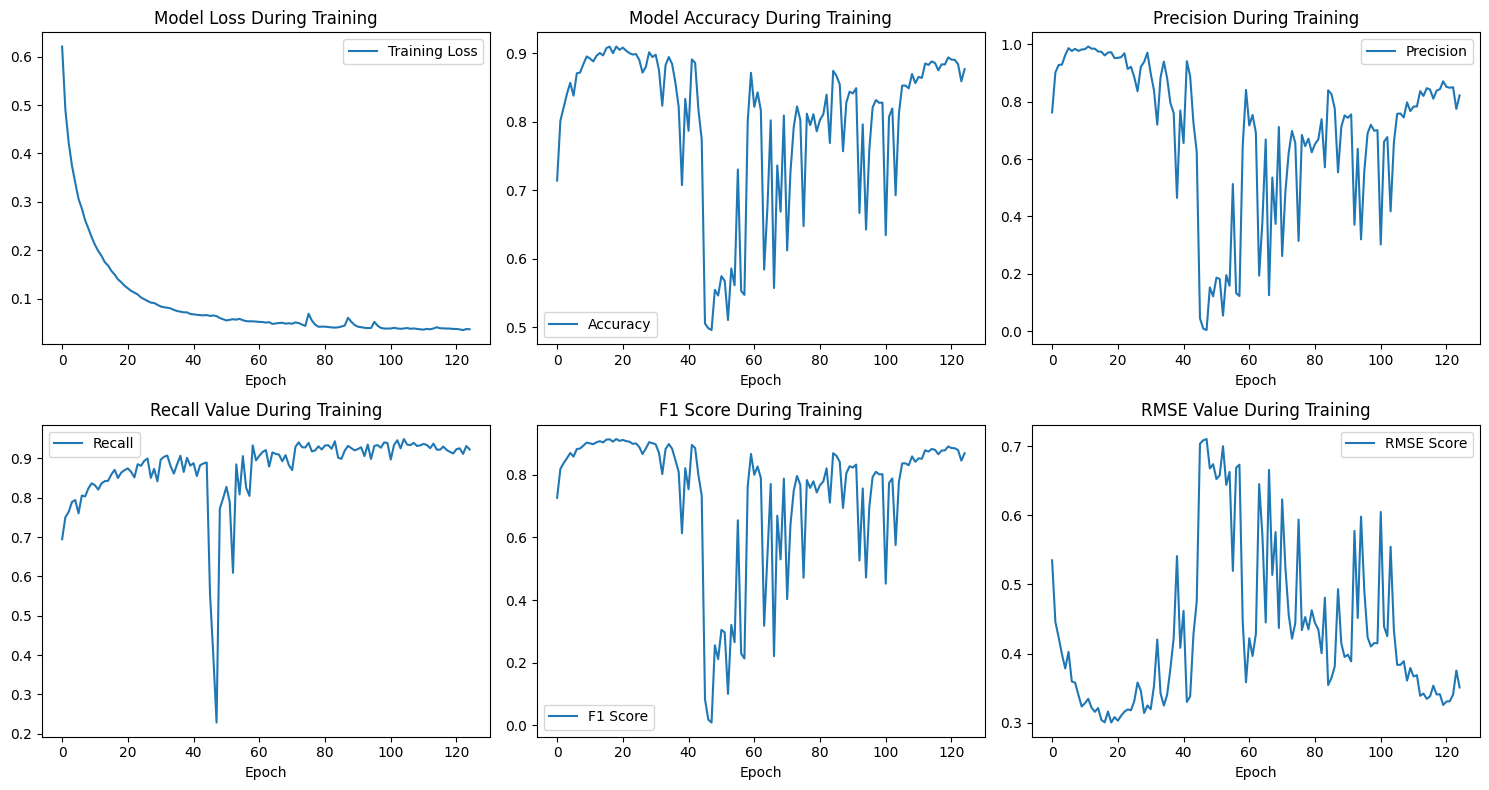

In [20]:
# Hyperparameter 2: Number of Epochs. Values = [50, 100, 125]. Want to analyze performance with half the epochs 
epoch_values = [50, 100, 125]
for epoch in epoch_values:
    trained_model_128 = train_model_(num_epochs=epoch, model=model_128)
    results(trained_model_128, epoch, 128)
    trained_model_256 = train_model_(num_epochs=epoch, model=model_256)
    results(trained_model_256, epoch, 256)
    trained_model_1024= train_model_(num_epochs=epoch, model=model_1024)
    results(trained_model_1024, epoch, 1024)
    trained_model_2048 = train_model_(num_epochs=epoch, model=model_2048)
    results(trained_model_2048, epoch, 2048)

    model_2048 = DeepDDI(drug_channels=256).to(device)
    model_1024 = DeepDDI(drug_channels=256, hidden_channels=1024).to(device)
    model_128 = DeepDDI(drug_channels=256, hidden_channels=128).to(device)
    model_256 = DeepDDI(drug_channels=256, hidden_channels=256).to(device)

## Model comparison

| Hidden Channels | Number of Epochs | Threshold | Stats                                  |
|-----------------|-------------------|-----------|----------------------------------------|
| 128             | 50                | 0.44      | ACC: 0.767, Precision: 0.599, Recall: 0.905, F1: 0.716, RMSE: 0.480 |
| 128             | 50                | 0.47      | ACC: 0.765, Precision: 0.593, Recall: 0.907, F1: 0.712, RMSE: 0.482 |
| 128             | 50                | 0.5       | ACC: 0.764, Precision: 0.587, Recall: 0.908, F1: 0.709, RMSE: 0.484 |
| 128             | 100               | 0.44      | ACC: 0.770, Precision: 0.626, Recall: 0.884, F1: 0.724, RMSE: 0.475 |
| 128             | 100               | 0.47      | ACC: 0.769, Precision: 0.621, Recall: 0.884, F1: 0.721, RMSE: 0.477 |
| 128             | 100               | 0.5       | ACC: 0.767, Precision: 0.615, Recall: 0.885, F1: 0.718, RMSE: 0.479 |
| 128             | 125               | 0.44      | ACC: 0.800, Precision: 0.683, Recall: 0.892, F1: 0.770, RMSE: 0.445 |
| 128             | 125               | 0.47      | ACC: 0.799, Precision: 0.680, Recall: 0.893, F1: 0.768, RMSE: 0.446 |
| 128             | 125               | 0.5       | ACC: 0.798, Precision: 0.677, Recall: 0.893, F1: 0.767, RMSE: 0.447 |
| 256             | 50                | 0.44      | ACC: 0.868, Precision: 0.849, Recall: 0.885, F1: 0.865, RMSE: 0.360 |
| 256             | 50                | 0.47      | ACC: 0.868, Precision: 0.846, Recall: 0.886, F1: 0.864, RMSE: 0.361 |
| 256             | 50                | 0.5       | ACC: 0.867, Precision: 0.844, Recall: 0.887, F1: 0.863, RMSE: 0.361 |
| 256             | 100               | 0.44      | ACC: 0.859, Precision: 0.806, Recall: 0.904, F1: 0.849, RMSE: 0.373 |
| 256             | 100               | 0.47      | ACC: 0.858, Precision: 0.804, Recall: 0.905, F1: 0.848, RMSE: 0.374 |
| 256             | 100               | 0.5       | ACC: 0.858, Precision: 0.802, Recall: 0.905, F1: 0.847, RMSE: 0.375 |
| 256             | 125               | 0.44      | ACC: 0.857, Precision: 0.815, Recall: 0.891, F1: 0.849, RMSE: 0.376 |
| 256             | 125               | 0.47      | ACC: 0.856, Precision: 0.813, Recall: 0.892, F1: 0.849, RMSE: 0.377 |
| 256             | 125               | 0.5       | ACC: 0.856, Precision: 0.811, Recall: 0.892, F1: 0.848, RMSE: 0.378 |
| 1024            | 50                | 0.44      | ACC: 0.864, Precision: 0.866, Recall: 0.869, F1: 0.862, RMSE: 0.365 |
| 1024            | 50                | 0.47      | ACC: 0.864, Precision: 0.863, Recall: 0.870, F1: 0.862, RMSE: 0.366 |
| 1024            | 50                | 0.5       | ACC: 0.864, Precision: 0.861, Recall: 0.871, F1: 0.861, RMSE: 0.366 |
| 1024            | 100               | 0.44      | ACC: 0.840, Precision: 0.789, Recall: 0.884, F1: 0.817, RMSE: 0.391 |
| 1024            | 100               | 0.47      | ACC: 0.839, Precision: 0.786, Recall: 0.885, F1: 0.816, RMSE: 0.392 |
| 1024            | 100               | 0.5       | ACC: 0.838, Precision: 0.783, Recall: 0.886, F1: 0.815, RMSE: 0.393 |
| 1024            | 125               | 0.44      | ACC: 0.863, Precision: 0.822, Recall: 0.900, F1: 0.852, RMSE: 0.366 |
| 1024            | 125               | 0.47      | ACC: 0.862, Precision: 0.820, Recall: 0.901, F1: 0.851, RMSE: 0.367 |
| 1024            | 125               | 0.5       | ACC: 0.862, Precision: 0.818, Recall: 0.902, F1: 0.851, RMSE: 0.367 |
| 2048            | 50                | 0.44      | ACC: 0.844, Precision: 0.853, Recall: 0.834, F1: 0.811, RMSE: 0.376 |
| 2048            | 50                | 0.47      | ACC: 0.845, Precision: 0.851, Recall: 0.835, F1: 0.811, RMSE: 0.376 |
| 2048            | 50                | 0.5       | ACC: 0.845, Precision: 0.850, Recall: 0.836, F1: 0.810, RMSE: 0.376 |
| 2048            | 100               | 0.44      | ACC: 0.782, Precision: 0.658, Recall: 0.882, F1: 0.714, RMSE: 0.453 |
| 2048            | 100               | 0.47      | ACC: 0.782, Precision: 0.656, Recall: 0.882, F1: 0.713, RMSE: 0.454 |
| 2048            | 100               | 0.5       | ACC: 0.781, Precision: 0.653, Recall: 0.883, F1: 0.711, RMSE: 0.455 |
| 2048            | 125               | 0.44      | ACC: 0.802, Precision: 0.697, Recall: 0.873, F1: 0.743, RMSE: 0.430 |
| 2048            | 125               | 0.47      | ACC: 0.802, Precision: 0.695, Recall: 0.874, F1: 0.743, RMSE: 0.431 |
| 2048            | 125               | 0.5       | ACC: 0.801, Precision: 0.693, Recall: 0.875, F1: 0.742, RMSE: 0.431 |

We identified classification threshold, number of training epochs, and number of hidden channels per layer as the three main parameters we could use in our experiments to verify the claims made in the original paper. The values used in it are 0.47, 100, and 2048 respectively. According to the table above, we could not match exactly the results proposed by the original paper. We obtained an accuracy of 78.2% using the values assumed to yield the best results. In our own experiments, however, we found that the best accuracies are obtained with 256 and 1024 number of hidden channels. From this, we can infer that training epochs and threshold are not that influential in the accuracy of the model since the results are not wildly different when the hidden channels were either one of the values mentioned before.

According to the original paper, DeepDDI achieves a 92.4% accuracy when trained for 100 epochs and the hidden layers have 2048 nodes each. Even though we were not able to match these results, we obtained about 87% accuracy in our experiments albeit with different parameters. The trends in the graphs were also interesting to analyze. After epoch 20, we saw the error rate increase while all other metrics became worse. We were not able to identify why this is, but after about epoch 80, we saw the trends starting to improve, slightly.

# Discussion

We were able to reproduce the models from this paper following implementation and procedures provided by ChemicalX. Loading the data was very simple as was training the model given the template supplied by the library. In addition, leveraging the evaluation metrics from the `scikit-learn` library, we had a simple way of assessing the quality of our models. The most difficult part in terms of reproducibility was the setup. The models had to be trained offline because of the memory and CPU caps in Colab. Moreover, we had to use the CUDA application to leverage an Nvidia GTXForce 4070 Super to aid during training. Without the GPU, it took over 24 hours to train all the models, while with the GPU we were able to train the models in 4 hours. Also, the library does not seem to be maintained (it requires Python version 3.8). Some versions are pinned to older Python versions which were not compatible with the Colab environment. We had to fork the repo (https://github.com/lucag2/chemicalx) and unpin the versions manually to make it compatible with Python 3.9. We were not able to match the exact results obtained by the authors, although we did get comparable accuracy values showing that DeepDDI does perform well with the provided dataset. As for future efforts, we would like to further analyze the models in order to understand the discrepancies between us and the authors as well as properly interpret the trends we observed in our graphs.

# References

1. Ryu, J.Y.; Kim, H.U.; Lee, S.Y. Deep learning improves prediction of drug–drug and drug–food interactions. Proc. Natl. Acad. Sci. USA 2018, 115, E4304–E4311 https://doi.org/10.1073/pnas.1803294115

2. Pirmohamed, M., & Orme, M. (1998). Drug interactions of clinical importance. Davies’s textbook of adverse drug reactions, 888-912.

3. DM Qato, J Wilder, LP Schumm, V Gillet, GC Alexander, Changes in prescription and over-the-counter medication and dietary supplement use among older adults in the United States, 2005 vs 2011. JAMA Intern Med 176, 473–482 (2016) https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2500064

4. F Cheng, Z Zhao, Machine learning-based prediction of drug-drug interactions by integrating drug phenotypic, therapeutic, chemical, and genomic properties. J Am Med Inform Assoc 21, e278–e286 (2014).

5. A Gottlieb, GY Stein, Y Oron, E Ruppin, R Sharan, INDI: A computational framework for inferring drug interactions and their associated recommendations. Mol Syst Biol 8, 592 (2012).

6. P Zhang, F Wang, J Hu, R Sorrentino, Label propagation prediction of drug-drug interactions based on clinical side effects. Sci Rep 5, 12339 (2015).

7. S Vilar, et al., Similarity-based modeling in large-scale prediction of drug-drug interactions. Nat Protoc 9, 2147–2163 (2014).

8. MA Yildirim, KI Goh, ME Cusick, AL Barabási, M Vidal, Drug-target network. Nat Biotechnol 25, 1119–1126 (2007).

9. K Park, D Kim, S Ha, D Lee, Predicting pharmacodynamic drug-drug interactions through signaling propagation interference on protein-protein interaction networks. PLoS One 10, e0140816 (2015).

10. J Huang, et al., Systematic prediction of pharmacodynamic drug-drug interactions through protein-protein-interaction network. PLoS Comput Biol 9, e1002998 (2013).

11. Benedek Rozemberczki, Charles Tapley Hoyt, Anna Gogleva, Piotr Grabowski, Klas Karis, Andrej Lamov, Andriy Nikolov, Sebastian Nilsson, Michael Ughetto, Yu Wang, Tyler Derr, and Benjamin M. Gyori. 2022. ChemicalX: A Deep Learning Library for Drug Pair Scoring. In Proceedings of the 28th ACM SIGKDD Conference on Knowledge Discovery and Data Mining (KDD '22). Association for Computing Machinery, New York, NY, USA, 3819–3828. https://doi.org/10.1145/3534678.3539023


